In [1]:
import sys # need to save the stdout, for whatever reason some other module is resetting things
stdout=sys.stdout

from ROOT import TFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import struct
%matplotlib inline

Welcome to JupyROOT 6.23/01


In [2]:
# reload(sys)
# sys.stdout = stdout

# Load the data

In [12]:
# weightsFile=TFile.Open("/d/grid15/ln16/pi0eta/q-values/degALL_BCAL_a0a2_treeFlat_DSelector_UTweights.root")
# nentries=weightsFile.degALL_BCAL_a0a2_tree_flat.GetEntries()
#weightsFile=TFile.Open("/d/grid15/ln16/pi0eta/092419/degALL_a0a2Test_treeFlat_DSelector_UTweights.root")
weightsFile=TFile.Open("/d/grid15/ln16/pi0eta/092419/degALL_ALL_a0a2_treeFlat_DSelector_UTweights.root")
#tree=weightsFile.degALL_a0a2Test_tree_flat
tree=weightsFile.degALL_ALL_a0a2_tree_flat

nentries=tree.GetEntries()
#nentries=50000

UT_weightBS=np.zeros(nentries)
# UT_weightBSeta=np.zeros(nentries)
# UT_weightBSpi0=np.zeros(nentries)
UT_equalWeights=np.zeros(nentries)
UT_bestChiWeights=np.zeros(nentries)
UT_spectBestChiWeights=np.zeros(nentries)
UT_spectEqualWeights=np.zeros(nentries)
UT_spectProbWeights=np.zeros(nentries)
UT_probWeights=np.zeros(nentries)
UT_chiSqs=np.zeros(nentries)
UT_nonUniqueEventNums=np.zeros(nentries)
UT_events=np.zeros(nentries)
UT_RFtimes=np.zeros(nentries)
UT_whichSignalRegions=np.zeros(nentries)
UT_isTruePi0Etas=np.zeros(nentries)
UT_beamPhotonMatchToThrowns=np.zeros(nentries)
UT_beamIDs=np.zeros(nentries)
UT_protonIDs=np.zeros(nentries)
UT_locNumUnusedShowers=np.zeros(nentries)

UT_Mpi0etas=np.zeros(nentries)
UT_Mpi0etas_thrown=np.zeros(nentries)
UT_Mpi0s=np.zeros(nentries)
UT_Metas=np.zeros(nentries)
UT_Mpi0etas_meas=np.zeros(nentries)
UT_Mpi0s_meas=np.zeros(nentries)
UT_Metas_meas=np.zeros(nentries)
UT_Mpi0ps=np.zeros(nentries)
UT_Metaps=np.zeros(nentries)
UT_cosTheta_eta_gjs=np.zeros(nentries)
UT_cosTheta_eta_gjs_meas=np.zeros(nentries)


UT_AccWeights=np.zeros(nentries)


for ievent,event in enumerate(tree):
    if ievent >= nentries:
        break
    UT_weightBS[ievent]=event.weightBS
#     UT_weightBSeta[ievent]=event.weightBSeta
#     UT_weightBSpi0[ievent]=event.weightBSpi0
    UT_equalWeights[ievent]=event.UT_equalWeights
    UT_chiSqs[ievent]=event.chiSq
    UT_bestChiWeights[ievent]=event.UT_bestChiWeights
    UT_spectBestChiWeights[ievent]=event.UT_spectBestChiWeights
    UT_spectEqualWeights[ievent]=event.UT_spectEqualWeights
    UT_spectProbWeights[ievent]=event.UT_spectProbWeights
    UT_probWeights[ievent]=event.UT_probWeights
    UT_events[ievent]=event.UT_uniqueEventNumbers
    UT_nonUniqueEventNums[ievent]=event.event
    UT_RFtimes[ievent]=event.rfTime
    UT_whichSignalRegions[ievent]=event.whichSignalRegion
    UT_isTruePi0Etas[ievent]=event.isTruePi0Eta
    UT_beamPhotonMatchToThrowns[ievent]=event.beamPhotonMatchToThrown
    UT_beamIDs[ievent]=event.beamID
    UT_protonIDs[ievent]=event.protonID
    UT_locNumUnusedShowers[ievent]=int(struct.unpack("1B",event.locNumUnusedShowers)[0])
    
    UT_cosTheta_eta_gjs[ievent]=event.cosTheta_eta_gj
    UT_cosTheta_eta_gjs_meas[ievent]=event.cosTheta_eta_gj_meas
    
    UT_Mpi0etas[ievent]=event.Mpi0eta
    UT_Mpi0etas_thrown[ievent]=event.Mpi0eta_thrown
    UT_Mpi0etas_meas[ievent]=event.Mpi0eta_meas
    UT_Mpi0s[ievent]=event.Mpi0
    UT_Mpi0s_meas[ievent]=event.Mpi0_meas
    UT_Metas[ievent]=event.Meta
    UT_Metas_meas[ievent]=event.Meta_meas
    UT_Mpi0ps[ievent]=event.Mpi0p
    UT_Metaps[ievent]=event.Metap
    UT_AccWeights[ievent]=event.AccWeight

In [13]:
weightsDict={"equalWeights":UT_equalWeights,
             "weightBS":UT_weightBS,
#              "sbWeightPi0":UT_weightBSpi0,
#              "sbWeightEta":UT_weightBSeta,
             "chiSqs":UT_chiSqs,
             "bestChiWeights":UT_bestChiWeights,
             "spectBestChiWeights":UT_spectBestChiWeights,
             "spectEqualWeights":UT_spectEqualWeights,
             "spectProbWeights":UT_spectProbWeights,
             "probWeights":UT_probWeights,
             "eventNumber":UT_events,
             "nonUniqueEventNumber":UT_nonUniqueEventNums,
             "rfTimes":UT_RFtimes,
             "whichSignalRegions":UT_whichSignalRegions,
             "isTruePi0Etas":UT_isTruePi0Etas,
             "beamPhotonMatchToThrowns":UT_beamPhotonMatchToThrowns,
             "beamIDs":UT_beamIDs,
             "protonIDs":UT_protonIDs,
             "locNumUnusedShowers":UT_locNumUnusedShowers,
             "cosTheta_eta_gjs":UT_cosTheta_eta_gjs,
             "cosTheta_eta_gjs_meas":UT_cosTheta_eta_gjs_meas,
             "Mpi0eta_thrown":UT_Mpi0etas_thrown,
             "Mpi0etas":UT_Mpi0etas,
             "Mpi0etas_meas":UT_Mpi0etas_meas,
             "Mpi0s":UT_Mpi0s,
             "Mpi0s_meas":UT_Mpi0s_meas,
             "Metas":UT_Metas,
             "Metas_meas":UT_Metas_meas,
             "Mpi0ps":UT_Mpi0ps,
             "Metaps":UT_Metaps,
             "AccWeights":UT_AccWeights
            }
df_weightsData=pd.DataFrame(weightsDict)

In [14]:
# Convert to bools
df_weightsData.beamPhotonMatchToThrowns=df_weightsData.beamPhotonMatchToThrowns.astype(bool)
df_weightsData.isTruePi0Etas=df_weightsData.isTruePi0Etas.astype(bool)

# Fill nan values to 0. This is from getting the p-values for large chiSqs.
df_weightsData.probWeights=df_weightsData.probWeights.fillna(0)

# Load the thrown information

In [15]:
# weightsFile=TFile.Open("degALL_a0a2Test_tree_DSelector.root")
# nentries=weightsFile.pi0eta__B4_M17_M7_Tree.GetEntries()
# thrown_Mpi0etas=np.zeros(nentries)
# thrown_events=np.zeros(nentries)

# for ievent,event in enumerate(weightsFile.pi0eta__B4_M17_M7_Tree):
#     thrown_Mpi0etas[ievent]=event.Mpi0eta_thrown
#     thrown_events[ievent]=event.EventNumber
    
# thrownDict={
#     "Mpi0etas":thrown_Mpi0etas,
#     "events":thrown_events
# }
# df_thrownData=pd.DataFrame(thrownDict)

# Calculate SB weights

In [16]:
# import the fit results so we can get the sigma/mean to help define the regions
folderLoc="/d/grid15/ln16/pi0eta/092419/fitMassToHist/fitResults/"
#folderLoc="/home/lawrence/Desktop/gluex/DSelector/"
fileNames=["etaFit_toMain_.txt","pi0Fit_toMain_.txt"]
params=[{},{}]

for ifile, fileName in enumerate(fileNames):
    fileLoc=folderLoc+fileName
    with open(fileLoc) as fitFile:
        for line in fitFile:
            lineArr=line.rstrip().lstrip().split(" ")
            context=lineArr[0]
            content=lineArr[1]
            if(context=="mass"):
                params[ifile][context]=float(content)
            if(context=="#weightedSigma"):
                params[ifile][context[1:]]=float(content)
sigmaEta=params[0]["weightedSigma"]
meanEta=params[0]["mass"]
sigmaPi0=params[1]["weightedSigma"]
meanPi0=params[1]["mass"]

# meanPi0=0.135881;
# meanEta=0.548625;
# sigmaPi0=0.0076;
# sigmaEta=0.0191;

pi0min,pi0max=0.065,0.225
etamin,etamax=0.3,0.8
pi0SigRegions=[3,4,6]
etaSigRegions=[3,4,9]

In [17]:
# define the different regions and their weights
piWeights=np.zeros(len(df_weightsData))
weightBinPi0 = [
    -np.inf,
    meanPi0-pi0SigRegions[2]*sigmaPi0,
    meanPi0-pi0SigRegions[1]*sigmaPi0,
    meanPi0-pi0SigRegions[0]*sigmaPi0,
    meanPi0+pi0SigRegions[0]*sigmaPi0,
    meanPi0+pi0SigRegions[1]*sigmaPi0,
    meanPi0+pi0SigRegions[2]*sigmaPi0,
    np.inf
             ]
sbWeightPi0=-1*(2*pi0SigRegions[0])/(2*(pi0SigRegions[2]-pi0SigRegions[1]))
weightsPi0=[0,sbWeightPi0,0,1,0,sbWeightPi0,0]

etaWeights=np.zeros(len(df_weightsData))
weightBinEta = [
    -np.inf,
    meanEta-etaSigRegions[2]*sigmaEta,
    meanEta-etaSigRegions[1]*sigmaEta,
    meanEta-etaSigRegions[0]*sigmaEta,
    meanEta+etaSigRegions[0]*sigmaEta,
    meanEta+etaSigRegions[1]*sigmaEta,
    meanEta+etaSigRegions[2]*sigmaEta,
    np.inf
             ]
sbWeightEta=-1.*(2*etaSigRegions[0])/(2*(etaSigRegions[2]-etaSigRegions[1]))
weightsEta=[0,sbWeightEta,0,1,0,sbWeightEta,0]

# Copy the Mpi0s and Metas columns so we can replace their values
df_weightsData["sbWeightPi0"]=df_weightsData.Mpi0s
df_weightsData["sbWeightEta"]=df_weightsData.Metas

# Replace the values by using a map
def getSBweight(value,weightBins,weights):
    for i in range(len(weights)):
        lower=weightBins[i]
        upper=weightBins[i+1]
        weight=weights[i]
        if value>lower and value<upper:
            return weight
df_weightsData.sbWeightPi0=df_weightsData.sbWeightPi0.apply(
    lambda val: getSBweight(val,weightBinPi0,weightsPi0))
df_weightsData.sbWeightEta=df_weightsData.sbWeightEta.apply(
    lambda val: getSBweight(val,weightBinEta,weightsEta))


In [18]:
df_weightsData["sbWeight"]=df_weightsData["sbWeightEta"]*df_weightsData["sbWeightPi0"]
df_weightsData["sbASWeight"]=df_weightsData["sbWeight"]*df_weightsData["AccWeights"]
df_weightsData["ctASWeight"]=df_weightsData["spectBestChiWeights"]*df_weightsData["AccWeights"]

# Make some checks

## Check number of events in the thrown and recon matches

### Make sure the total weight for all the tracking schemes agree

We had to do some unscrambling of event numbers due to MC producing multiple events with the same event number. After unscrambling lets see if the maximum event number agrees with the length of the thrownData. In principle the thrown data should have N events which should agree with the max event number after unscrambling

In [19]:
print("Weights data max eventNum: {0}".format(df_weightsData.eventNumber.max()))
#print("Thrown data length: {0}".format(len(df_thrownData)))
#assert(len(df_thrownData)==df_weightsData.eventNumber.max())
# Make sure the events are the same between the two root files
#np.prod(np.unique(UT_events)==np.unique(thrown_events))

Weights data max eventNum: 441977.0


Checking to see if the integrated weights are the same between the 3 different tracking schemes

In [20]:
sumWeighted=df_weightsData.equalWeights.sum()
sumBestChi=df_weightsData.bestChiWeights.sum()
sumProbWeights=df_weightsData.probWeights.sum()

#sumThrown=len(df_thrownData["Mpi0etas"])

print("Sum weights = equal: {0}, bestChi: {1}, prob: {2}".format(sumWeighted,sumBestChi,sumProbWeights))

Sum weights = equal: 441977.0, bestChi: 441977.0, prob: 441977.0


In [21]:
countProbWeights=df_weightsData[["equalWeights","bestChiWeights","probWeights",
                                 "eventNumber"]].groupby("eventNumber").sum()["probWeights"]
countNotOne=len(countProbWeights[abs(countProbWeights-1.0)>0.01])
sumNotOne=sum(countProbWeights[abs(countProbWeights-1.0)>0.01])
print("If we include the pValues with that ended with all 0s (due to normalization)"\
      "we get {0}".format(countNotOne+sumProbWeights))
print("Hopefully the sum is 0: sum={0}".format(sumNotOne))

# make sure the counts make sense at this point
assert(abs(sumWeighted-(countNotOne+sumProbWeights))<0.001)

If we include the pValues with that ended with all 0s (due to normalization)we get 441977.0
Hopefully the sum is 0: sum=0


### Make sure the total weight agrees among the spectroscopic tracking scheme

In [22]:
df_weightsDataSubset=df_weightsData[["eventNumber","beamIDs","spectBestChiWeights","spectEqualWeights",
                                     "spectProbWeights"]]
print(df_weightsDataSubset.groupby(["eventNumber","beamIDs"]).sum().sum())
grouped=df_weightsDataSubset.groupby(["eventNumber","beamIDs"]).sum()
numBeamWithZeroWeights=(grouped.spectProbWeights==0).sum()
print("The remainder of spectProbWeights should have been pValues=0 due to precision of converting"\
     "chiSq to pValues. If pValue and Normalization is small then we get a NaN or 0")
print("Num beam photons with zero spectProbWeight: {0}".format(numBeamWithZeroWeights))

spectBestChiWeights    1142515.0
spectEqualWeights      1142515.0
spectProbWeights       1142515.0
dtype: float64
The remainder of spectProbWeights should have been pValues=0 due to precision of convertingchiSq to pValues. If pValue and Normalization is small then we get a NaN or 0
Num beam photons with zero spectProbWeight: 0


## Checking how accidentals are subtracted in the RF time plot

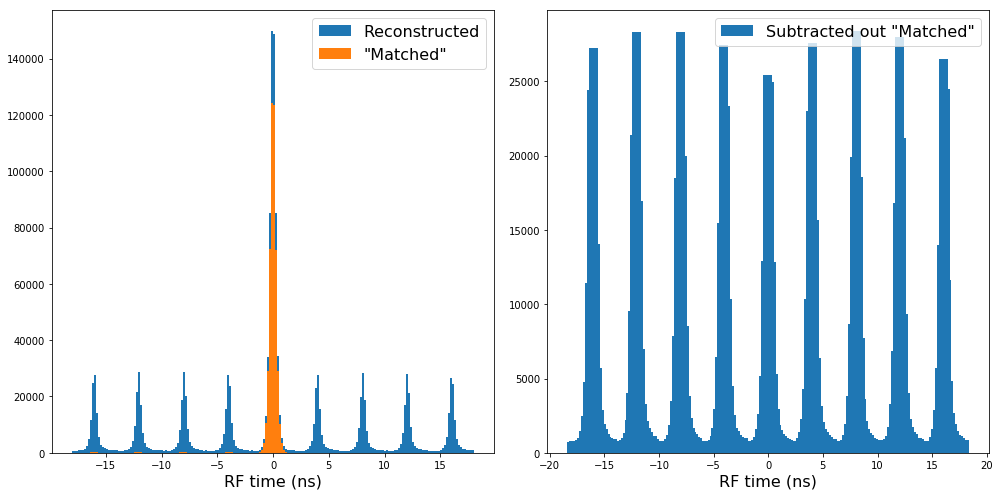

In [23]:
fig,ax=plt.subplots(1,2,figsize=(14,7))
counts, binedges=np.histogram(df_weightsData.rfTimes,bins=200)
countsTruth=np.histogram(df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True].rfTimes,bins=binedges)[0]
plot1=ax[0].hist(df_weightsData.rfTimes,bins=binedges,label="Reconstructed")
plot2=ax[0].hist(df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True].rfTimes,
                 bins=binedges,label='"Matched"')

numTrue=sum(df_weightsData.beamPhotonMatchToThrowns==True)
numPrompt=len(df_weightsData[(df_weightsData.rfTimes>-2) & (df_weightsData.rfTimes<2)])
numAcc=len(df_weightsData[(df_weightsData.rfTimes<-2) | (df_weightsData.rfTimes>2)])

ax[0].legend(prop={'size': 16})
ax[0].set_xlabel("RF time (ns)",size=16)
plot3=ax[1].bar(np.linspace(-18,18,200),height=(plot1[0]-plot2[0]),label='Subtracted out "Matched"')
ax[1].set_xlabel("RF time (ns)",size=16)
ax[1].legend(prop={'size': 16})
plt.tight_layout()

## Checking total number of combos

Text(0.5,1,'Density plot of Num SpectCombos with Matched Beam Photons')

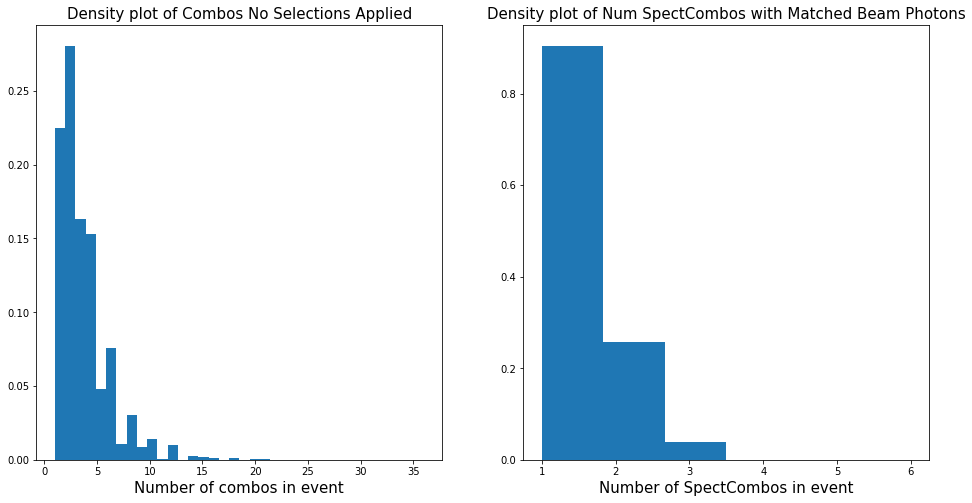

In [24]:
combosPerEvent=1/df_weightsData.groupby("eventNumber").equalWeights.first()
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(combosPerEvent,bins=int(combosPerEvent.max()),density=True)
ax[0].set_xlabel("Number of combos in event",size=15)
ax[0].set_title("Density plot of Combos No Selections Applied",size=15)

numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts().values
ax[1].hist(numSpectCombos,density=True,bins=numSpectCombos.max())
ax[1].set_xlabel("Number of SpectCombos in event",size=15)
ax[1].set_title("Density plot of Num SpectCombos with Matched Beam Photons",size=15)

I suspect that the distribution of the number of unique combos differ between the a0 and a2 cases. The a0 case should have a bunch more combinatorics so we will not have as much events with only 1 or 2 combos.

## Given trueBeam does chiSq separate truePi0Eta and combinatorics?

In [25]:
# Looking at some events that have 2 spectroscopic combos given trueBeam
numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts()
twoComboIndicies=numSpectCombos[numSpectCombos==2].index
df_weightsDataTrueBeam=df_weightsData[df_weightsData.beamPhotonMatchToThrowns]
df_weightsDataTrueBeam[["chiSqs","Metas","Mpi0s","spectProbWeights","spectEqualWeights",
                        "beamPhotonMatchToThrowns"]][df_weightsDataTrueBeam.eventNumber==twoComboIndicies[4]]

,chiSqs,Metas,Mpi0s,spectProbWeights,spectEqualWeights,beamPhotonMatchToThrowns
757612,1.762362,0.677671,0.083192,0.5,0.5,True
757613,1.762362,0.539996,0.137120,0.5,0.5,True


In [26]:
# how much of our events have only 1 unique chiSq value. This gives us a hint about how
# the chiSqs might vary in an event. Turns out much of the chiSqs is identical
singleChiEvents=df_weightsDataTrueBeam.groupby("eventNumber").chiSqs.nunique().eq(1)
notSingleChiEvents=df_weightsDataTrueBeam.groupby("eventNumber").chiSqs.nunique().ne(1)
1.*sum(notSingleChiEvents)/sum(singleChiEvents)

0.00017619384478637152

In [27]:
# Looking at some events that have 2 spectroscopic combos given trueBeam
indNotSingleChi=notSingleChiEvents[notSingleChiEvents].index
df_weightsDataTrueBeam[["chiSqs","Metas","Mpi0s","spectProbWeights","spectEqualWeights",
                        "beamPhotonMatchToThrowns","beamIDs","isTruePi0Etas"]][
    df_weightsDataTrueBeam.eventNumber==indNotSingleChi[0]]

,chiSqs,Metas,Mpi0s,spectProbWeights,spectEqualWeights,beamPhotonMatchToThrowns,beamIDs,isTruePi0Etas
6138,6.745214,0.556367,0.126547,0.389468,0.5,True,3.0,True
6142,5.552995,0.554890,0.126975,0.610532,0.5,True,3.0,True


Text(0.5,0,'MatchedPi0Eta $\\chi^2$ - min(FakePi0Eta $\\chi^2$)')

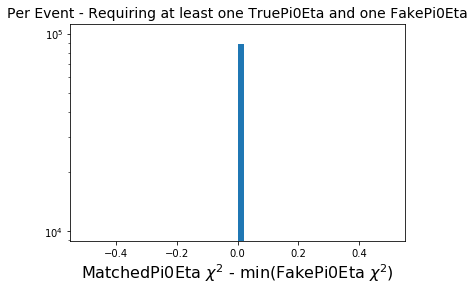

In [28]:
# Given trueBeam what is the difference between the minimum chiSq for the truePi0Eta vs the minumum chiSq
# for fake pi0eta combo.
grouped2=df_weightsDataTrueBeam.groupby(["eventNumber","isTruePi0Etas"]).chiSqs.min()
grouped2=grouped2.reset_index().groupby("eventNumber").filter(lambda x: x.chiSqs.size>1)
diffChi=grouped2[grouped2.isTruePi0Etas][["chiSqs"]].reset_index(drop=True)-grouped2[~grouped2.isTruePi0Etas][["chiSqs"]].reset_index(drop=True)
plt.hist(diffChi.chiSqs,bins=50)
plt.yscale("log")
plt.title("Per Event - Requiring at least one TruePi0Eta and one FakePi0Eta",size=14)
plt.xlabel("MatchedPi0Eta $\chi^2$ - min(FakePi0Eta $\chi^2$)",size=16)

In [29]:
chooseChiLargerThan=5
grouped2[grouped2.isTruePi0Etas].eventNumber.iloc[diffChi.chiSqs.values>chooseChiLargerThan]
df_weightsDataTrueBeam[["isTruePi0Etas","chiSqs"]][df_weightsDataTrueBeam.eventNumber==2364]

,isTruePi0Etas,chiSqs
9106,True,3.341987
9113,False,3.341987


## Number of unused showers

In [30]:
df_weightsData.locNumUnusedShowers.value_counts()
if df_weightsData.locNumUnusedShowers.max() > 0:
    plt.yscale('log')
    plt.title("Number of extra showers in combo")
    plt.xlabel("Number of extra showers in combo")
    plt.hist(df_weightsData.locNumUnusedShowers,bins=int(df_weightsData.locNumUnusedShowers.max()))

/d/home/ln16/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/d/home/ln16/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:903: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


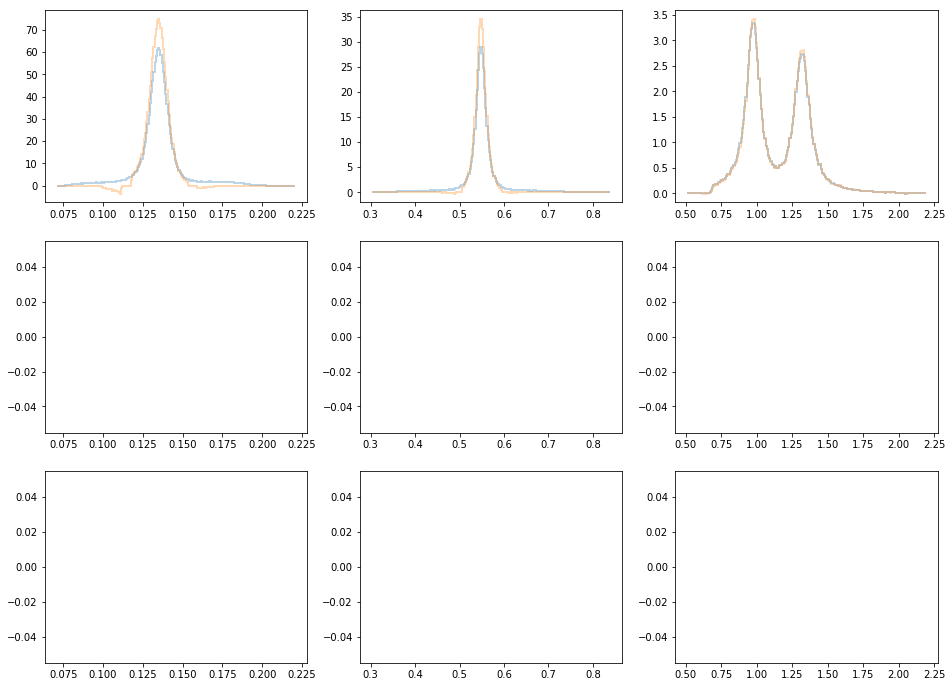

In [31]:
fig,ax=plt.subplots(3,3,figsize=(16,12))
ax=ax.flatten()
binEdgesPi0=np.histogram(df_weightsData.Mpi0s,bins=200)[1]
binEdgesEta=np.histogram(df_weightsData.Metas,bins=200)[1]
binEdgesPi0Eta=np.histogram(df_weightsData.Mpi0etas,bins=200)[1]

# ---- No Weights
# for iExtraShowers in range(3):
#     df_weightsDataSubset=df_weightsData[df_weightsData.locNumUnusedShowers==iExtraShowers]
#     ax[iExtraShowers*3].hist(df_weightsDataSubset.Mpi0s,bins=binEdgesPi0,
#                              normed=True,alpha=0.3,histtype=u'step',linewidth=2,
#                             label="")
#     ax[iExtraShowers*3+1].hist(df_weightsDataSubset.Metas,bins=binEdgesEta,
#                                normed=True,alpha=0.3,histtype=u'step',linewidth=2)
#     ax[iExtraShowers*3+2].hist(df_weightsDataSubset.Mpi0etas,bins=binEdgesPi0Eta,
#                                normed=True,alpha=0.3,histtype=u'step',linewidth=2)

# ----- AS weights applied
# for iExtraShowers in range(3):
#     df_weightsDataSubset=df_weightsData[df_weightsData.locNumUnusedShowers==iExtraShowers]
#     ax[iExtraShowers*3].hist(df_weightsDataSubset.Mpi0s,bins=binEdgesPi0,normed=True,
#                              alpha=0.3,histtype=u'step',linewidth=2,
#                              weights=df_weightsDataSubset.AccWeights)
#     ax[iExtraShowers*3+1].hist(df_weightsDataSubset.Metas,bins=binEdgesEta,normed=True,
#                                alpha=0.3,histtype=u'step',linewidth=2,
#                                weights=df_weightsDataSubset.AccWeights)
#     ax[iExtraShowers*3+2].hist(df_weightsDataSubset.Mpi0etas,bins=binEdgesPi0Eta,normed=True,
#                                alpha=0.3,histtype=u'step',linewidth=2,
#                                weights=df_weightsDataSubset.AccWeights)

# ----- AS*CT weights
for iExtraShowers in range(3):
    df_weightsDataSubset=df_weightsData[df_weightsData.locNumUnusedShowers==iExtraShowers]
    ax[iExtraShowers*3].hist(df_weightsDataSubset.Mpi0s,bins=binEdgesPi0,normed=True,
                             alpha=0.3,histtype=u'step',linewidth=2,
                             weights=df_weightsDataSubset.AccWeights*df_weightsDataSubset.spectBestChiWeights)
    ax[iExtraShowers*3+1].hist(df_weightsDataSubset.Metas,bins=binEdgesEta,normed=True,
                               alpha=0.3,histtype=u'step',linewidth=2,
                               weights=df_weightsDataSubset.AccWeights*df_weightsDataSubset.spectBestChiWeights)
    ax[iExtraShowers*3+2].hist(df_weightsDataSubset.Mpi0etas,bins=binEdgesPi0Eta,normed=True,
                               alpha=0.3,histtype=u'step',linewidth=2,
                               weights=df_weightsDataSubset.AccWeights*df_weightsDataSubset.spectBestChiWeights)
    
# ------ AS*SB weights
for iExtraShowers in range(3):
    df_weightsDataSubset=df_weightsData[df_weightsData.locNumUnusedShowers==iExtraShowers]
    ax[iExtraShowers*3].hist(df_weightsDataSubset.Mpi0s,bins=binEdgesPi0,normed=True,
                             alpha=0.3,histtype=u'step',linewidth=2,
                             weights=df_weightsDataSubset.AccWeights*df_weightsDataSubset.sbWeight)
    ax[iExtraShowers*3+1].hist(df_weightsDataSubset.Metas,bins=binEdgesEta,normed=True,
                               alpha=0.3,histtype=u'step',linewidth=2,
                               weights=df_weightsDataSubset.AccWeights*df_weightsDataSubset.sbWeight)
    ax[iExtraShowers*3+2].hist(df_weightsDataSubset.Mpi0etas,bins=binEdgesPi0Eta,normed=True,
                               alpha=0.3,histtype=u'step',linewidth=2,
                               weights=df_weightsDataSubset.AccWeights*df_weightsDataSubset.sbWeight)

## Checking Weight Distributions

What do the weight distributions look like? If we sum up the accidental subtraction weights per event, take the avg, we get the red line of figure 1. The avg is very close to the true beam. The avg using the sideband weights is also very close to the true pi0eta. The product is even closer. If we look at the AS * CT avg we see that it is also very close but the distribution looks very different. Not sure what this tells me

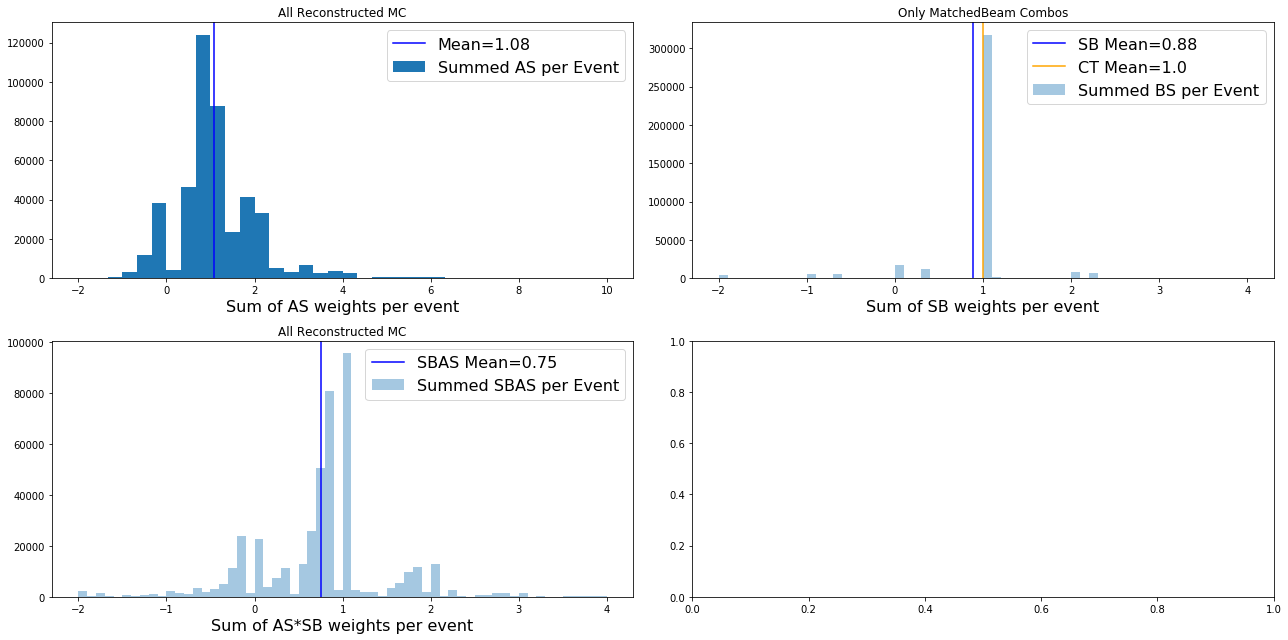

In [32]:
fig,ax=plt.subplots(2,2,figsize=(18,9))
ax=ax.flatten()

# What does the distribution of the "summed AS weights per event" look like?
df_summedASperEvent=df_weightsData.groupby("eventNumber").AccWeights.sum()
ax[0].hist(df_summedASperEvent,bins=36,label="Summed AS per Event",range=(-2,10))
meanAS=df_summedASperEvent.mean()
ax[0].axvline(meanAS,c='Blue',label="Mean="+str(int(meanAS*100)/100.0))
ax[0].legend(prop={'size': 16})
ax[0].set_title("All Reconstructed MC")
ax[0].set_xlabel("Sum of AS weights per event",size=16)

df_weightsDataMatchedBeam=df_weightsData[df_weightsData.beamPhotonMatchToThrowns]
df_summedSBperEvent=df_weightsDataMatchedBeam.groupby("eventNumber").sbWeight.sum()
binEdges=np.histogram(df_summedSBperEvent,bins=60,range=(-2,4))[1]
ax[1].hist(df_summedSBperEvent,bins=binEdges,label="Summed BS per Event",alpha=0.4)
meanSB=df_summedSBperEvent.mean()
ax[1].axvline(meanSB,c='Blue',label="SB Mean="+str(int(meanSB*100)/100.0))
# # CT
df_summedCTperEvent=df_weightsDataMatchedBeam.groupby("eventNumber").spectBestChiWeights.sum()
#ax[1].hist(df_summedSBperEvent,bins=binEdges,label="Summed CT per Event",alpha=0.4)
meanCT=df_summedCTperEvent.mean()
ax[1].axvline(meanCT,c='Orange',label="CT Mean="+str(int(meanCT*100)/100.0))
ax[1].legend(prop={'size': 16})
ax[1].set_title("Only MatchedBeam Combos")
ax[1].set_xlabel("Sum of SB weights per event",size=16)

df_summedSBASperEvent=df_weightsData.groupby("eventNumber").sbASWeight.sum()
binEdges=np.histogram(df_summedSBASperEvent,bins=60,range=(-2,4))[1]
ax[2].hist(df_summedSBASperEvent,bins=binEdges,label="Summed SBAS per Event",alpha=0.4)
meanSBAS=df_summedSBASperEvent.mean()
ax[2].axvline(meanSBAS,c='Blue',label="SBAS Mean="+str(int(meanSBAS*100)/100.0))
#fracEventsUseMatchedBeam=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.nunique()/df_weightsData.eventNumber.max()
#ax[2].set_title("Fraction of events using MatchedBeam: "+str(int(100*fracEventsUseMatchedBeam)/100.0))
ax[2].legend(prop={'size': 16})
ax[2].set_title("All Reconstructed MC")
ax[2].set_xlabel("Sum of AS*SB weights per event",size=16)

# binedges=np.histogram(df_weightsDataMatchedBeam.Mpi0etas,bins=200)[1]
# ax[4].hist(df_weightsDataMatchedBeam.Mpi0etas,weights=df_weightsDataMatchedBeam.spectBestChiWeights,
#        bins=binedges,alpha=0.4,label="SpectBest")
# ax[4].hist(df_weightsDataMatchedBeam.Mpi0etas,weights=df_weightsDataMatchedBeam.sbWeight,
#        bins=binedges,alpha=0.4,label="SB")
# ax[4].set_title("Only MatchedBeam combos")
# ax[4].legend()

# binedges=np.histogram(df_weightsData.Mpi0etas,bins=200)[1]
# ax[5].hist(df_weightsData.Mpi0etas,weights=df_weightsData.spectBestChiWeights*
#            df_weightsData.AccWeights,
#         bins=binedges,alpha=0.4,label="AS*SpectBest")
# ax[5].hist(df_weightsData.Mpi0etas,weights=df_weightsData.sbWeight*
#            df_weightsData.AccWeights,
#         bins=binedges,alpha=0.4,label="AS*SB")
# ax[5].set_title("Only MatchedBeam combos")
# ax[5].legend()

plt.tight_layout()

In [33]:
valueCountedSBweights=df_summedSBperEvent.value_counts().iloc[:10]
valueCountedSBweights

 1.0    317966
 0.0     17444
 0.4     11398
 2.0      7721
 2.2      7326
-0.6      5519
-1.0      5346
-2.0      4572
 1.2       948
-2.6       293
Name: sbWeight, dtype: int64

In [34]:
def getFirstOccurenceWithWeight(weightIndex,occurence):
    '''
    Get the index of the weight you are interested in to get a sample of. If we want to see a sample
    event with summed BS weight=1 then we will use index 0, as shown above
    We need to use the weightIndex since the weights are not exact. i.e. weight 0.2 is actually like 0.199996
    '''
    return df_weightsData[(df_weightsData.beamPhotonMatchToThrowns)*
                   (df_weightsData.eventNumber==df_summedSBperEvent[
                       df_summedSBperEvent==valueCountedSBweights.index[weightIndex]].index[occurence])]

In [35]:
getFirstOccurenceWithWeight(2,1)

/d/home/ln16/.local/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,AccWeights,Metaps,Metas,Metas_meas,Mpi0eta_thrown,Mpi0etas,Mpi0etas_meas,Mpi0ps,Mpi0s,Mpi0s_meas,...,spectBestChiWeights,spectEqualWeights,spectProbWeights,weightBS,whichSignalRegions,sbWeightPi0,sbWeightEta,sbWeight,sbASWeight,ctASWeight
71,1.0,4.034147,0.535042,0.534394,0.755342,0.73739,0.735863,1.748658,0.122561,0.122366,...,1.0,0.5,0.5,1.0,1.0,1,1.0,1.0,1.0,1.0
73,1.0,4.048991,0.467532,0.465925,0.755342,0.73739,0.735863,1.695353,0.138222,0.138312,...,0.0,0.5,0.5,-0.6,3.0,1,-0.6,-0.6,-0.6,0.0


## Checking effects of accidental subtraction on various mass plots

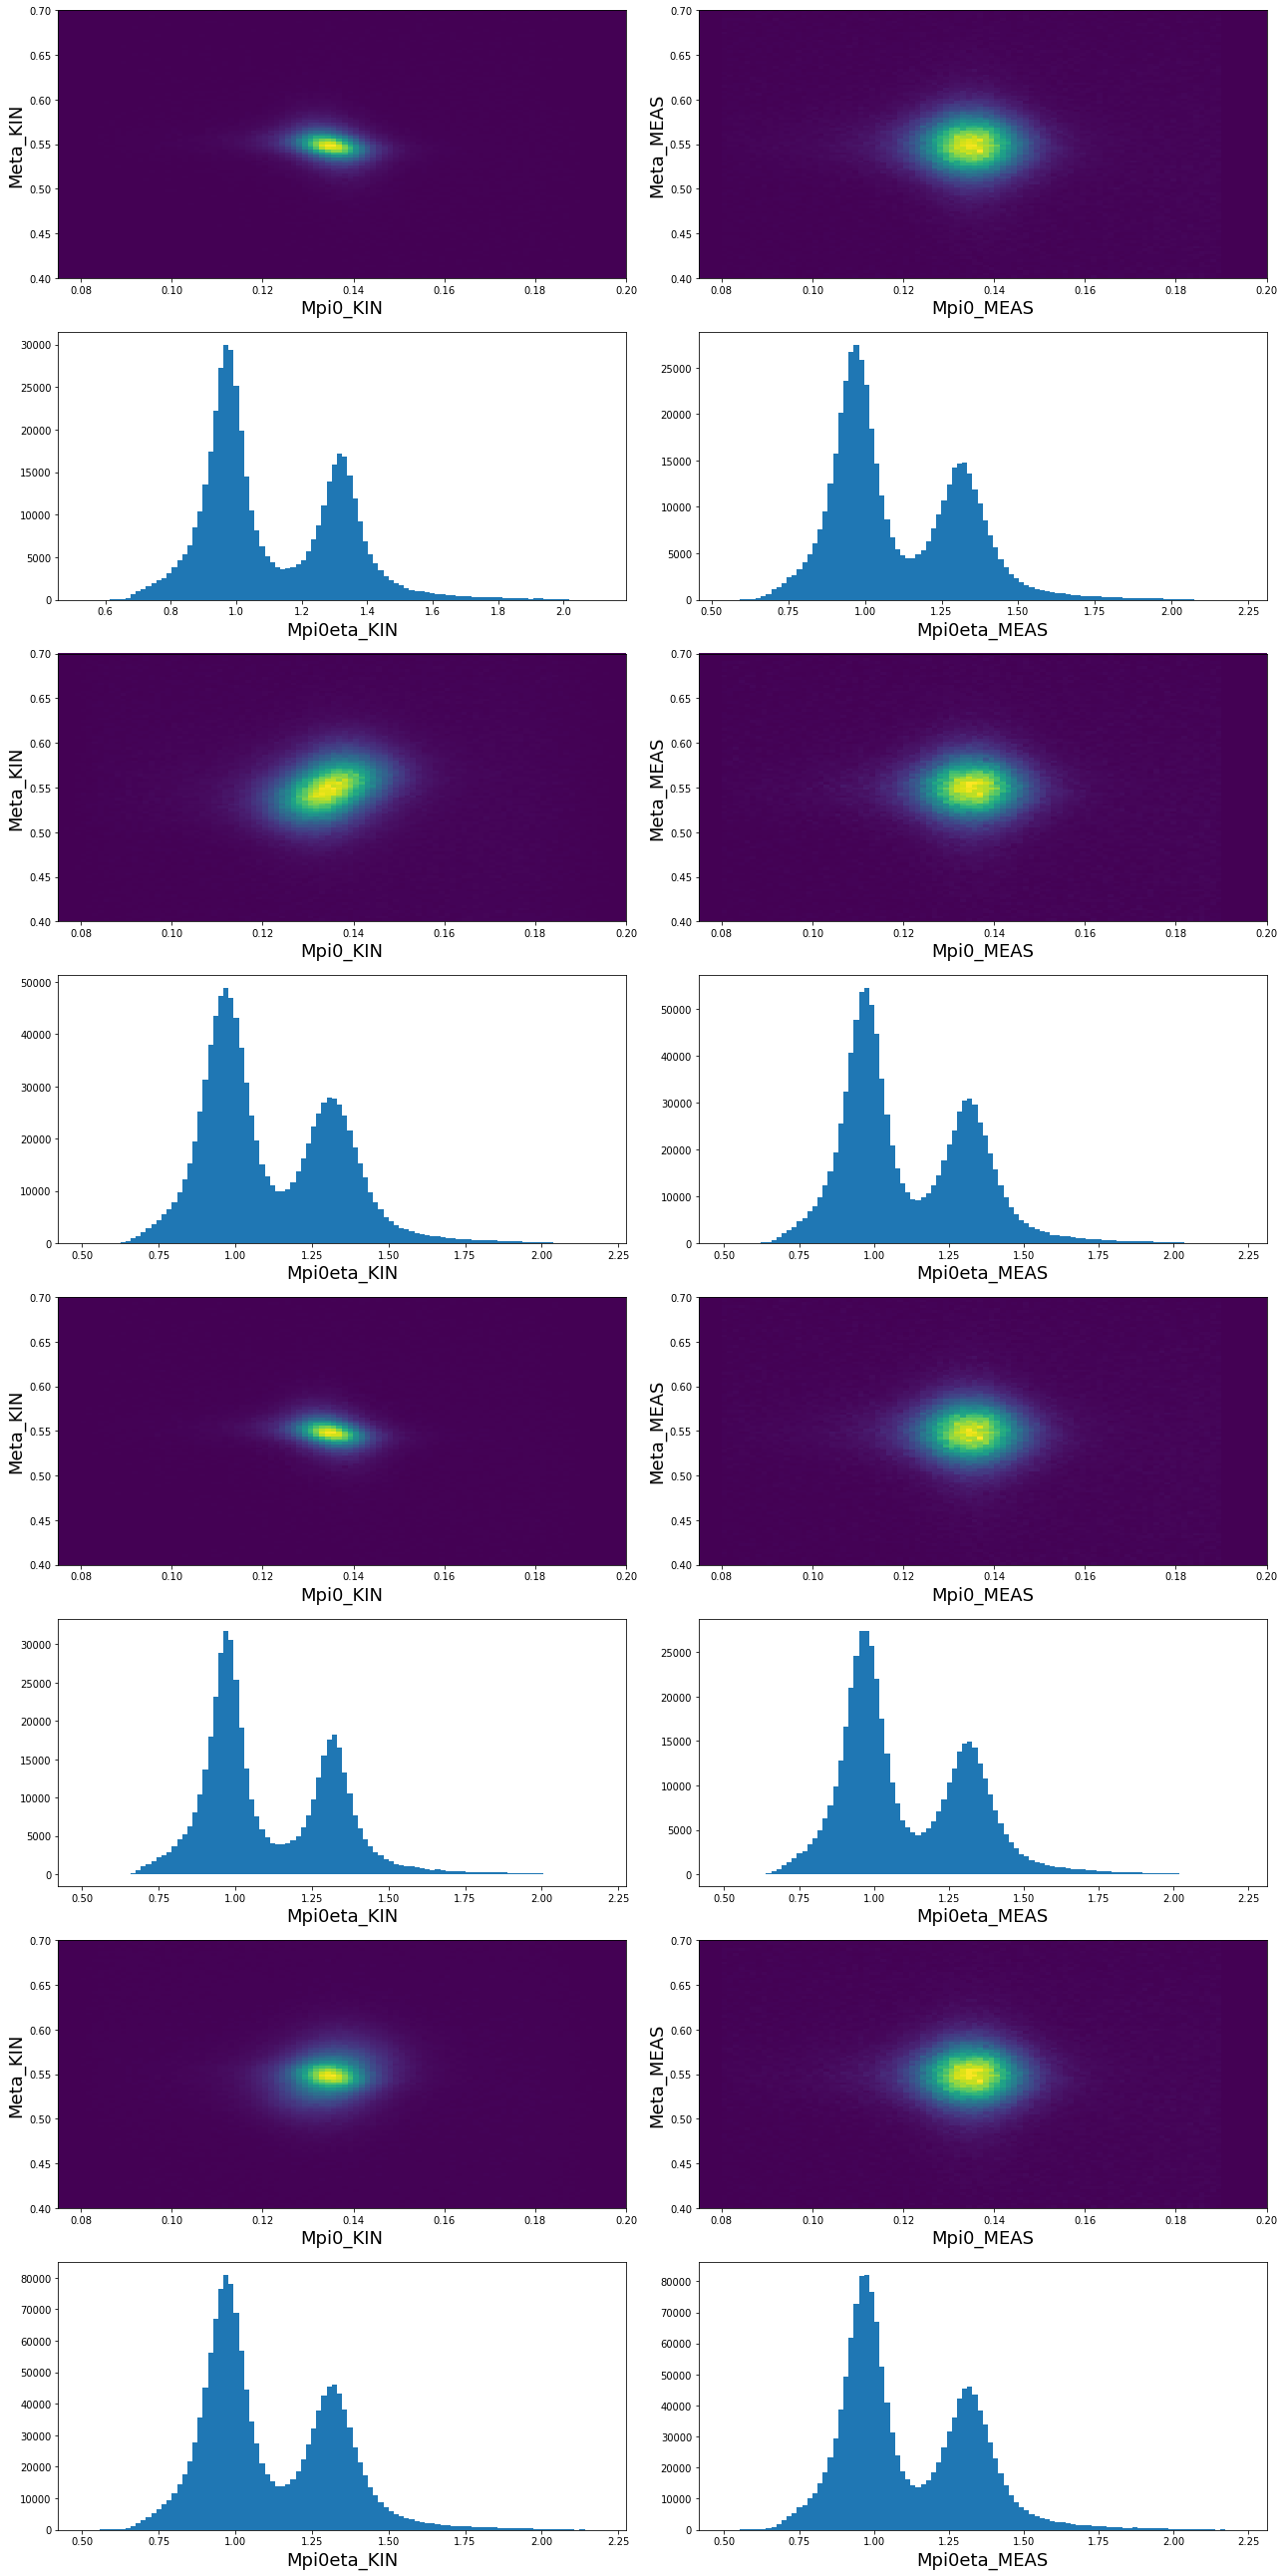

In [36]:
fig,axes=plt.subplots(8,2,figsize=(18,36))
# Selecting True beam photons and then selecting non-True beam photons. Plotting the Meta/Mpi0/Mpi0eta
# distributions
for i,isTrueBeam in enumerate([True,False]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes=axes.flatten()
    axes[0+i*4].hist2d(df_weightsDataSubset.Mpi0s,df_weightsDataSubset.Metas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
    axes[0+i*4].set_xlabel("Mpi0_KIN",size=18)
    axes[0+i*4].set_ylabel("Meta_KIN",size=18)
    axes[1+i*4].hist2d(df_weightsDataSubset.Mpi0s_meas,df_weightsDataSubset.Metas_meas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
    axes[1+i*4].set_xlabel("Mpi0_MEAS",size=18)
    axes[1+i*4].set_ylabel("Meta_MEAS",size=18)
    axes[2+i*4].hist(df_weightsDataSubset.Mpi0etas,bins=100)
    axes[2+i*4].set_xlabel("Mpi0eta_KIN",size=18)
    axes[3+i*4].hist(df_weightsDataSubset.Mpi0etas_meas,bins=100)
    axes[3+i*4].set_xlabel("Mpi0eta_MEAS",size=18)

    
# Accidental Weighted    
axes[8].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas, weights=df_weightsData.AccWeights,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[8].set_xlabel("Mpi0_KIN",size=18)
axes[8].set_ylabel("Meta_KIN",size=18)
axes[9].hist2d(df_weightsData.Mpi0s_meas,df_weightsData.Metas_meas, weights=df_weightsData.AccWeights,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[9].set_xlabel("Mpi0_MEAS",size=18)
axes[9].set_ylabel("Meta_MEAS",size=18)
axes[10].hist(df_weightsData.Mpi0etas,bins=100, weights=df_weightsData.AccWeights)
axes[10].set_xlabel("Mpi0eta_KIN",size=18)
axes[11].hist(df_weightsData.Mpi0etas_meas,bins=100, weights=df_weightsData.AccWeights)
axes[11].set_xlabel("Mpi0eta_MEAS",size=18)


# Both true and accidentals but not accidental weighted
axes[12].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[12].set_xlabel("Mpi0_KIN",size=18)
axes[12].set_ylabel("Meta_KIN",size=18)
axes[13].hist2d(df_weightsData.Mpi0s_meas,df_weightsData.Metas_meas,
                       bins=(100,100),range=[[0.075,0.2],[0.4,0.7]]
                      )
axes[13].set_xlabel("Mpi0_MEAS",size=18)
axes[13].set_ylabel("Meta_MEAS",size=18)
axes[14].hist(df_weightsData.Mpi0etas,bins=100)
axes[14].set_xlabel("Mpi0eta_KIN",size=18)
axes[15].hist(df_weightsData.Mpi0etas_meas,bins=100)
axes[15].set_xlabel("Mpi0eta_MEAS",size=18)
    
plt.tight_layout()
plt.rcParams.update({'font.size': 12})

Compare the Mpi0eta distribution of the "True" beam combos with the accidentally subtracted combos

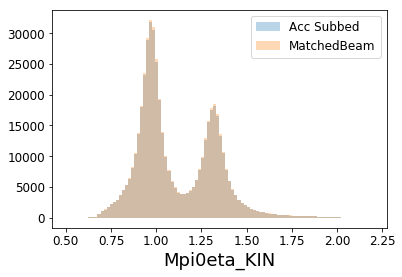

In [37]:
binedges=np.histogram(df_weightsData.Mpi0etas,bins=100)[1]
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==1]
fig,ax=plt.subplots(1,1)
ax.hist(df_weightsData.Mpi0etas,bins=binedges, weights=df_weightsData.AccWeights,label="Acc Subbed",alpha=0.3)
ax.hist(df_weightsDataSubset.Mpi0etas,bins=binedges, label='MatchedBeam',alpha=0.3)
ax.set_xlabel("Mpi0eta_KIN",size=18)
ax.set_xlabel("Mpi0eta_KIN",size=18)
ax.legend()

## Checking accidental subtraction on GJ angles

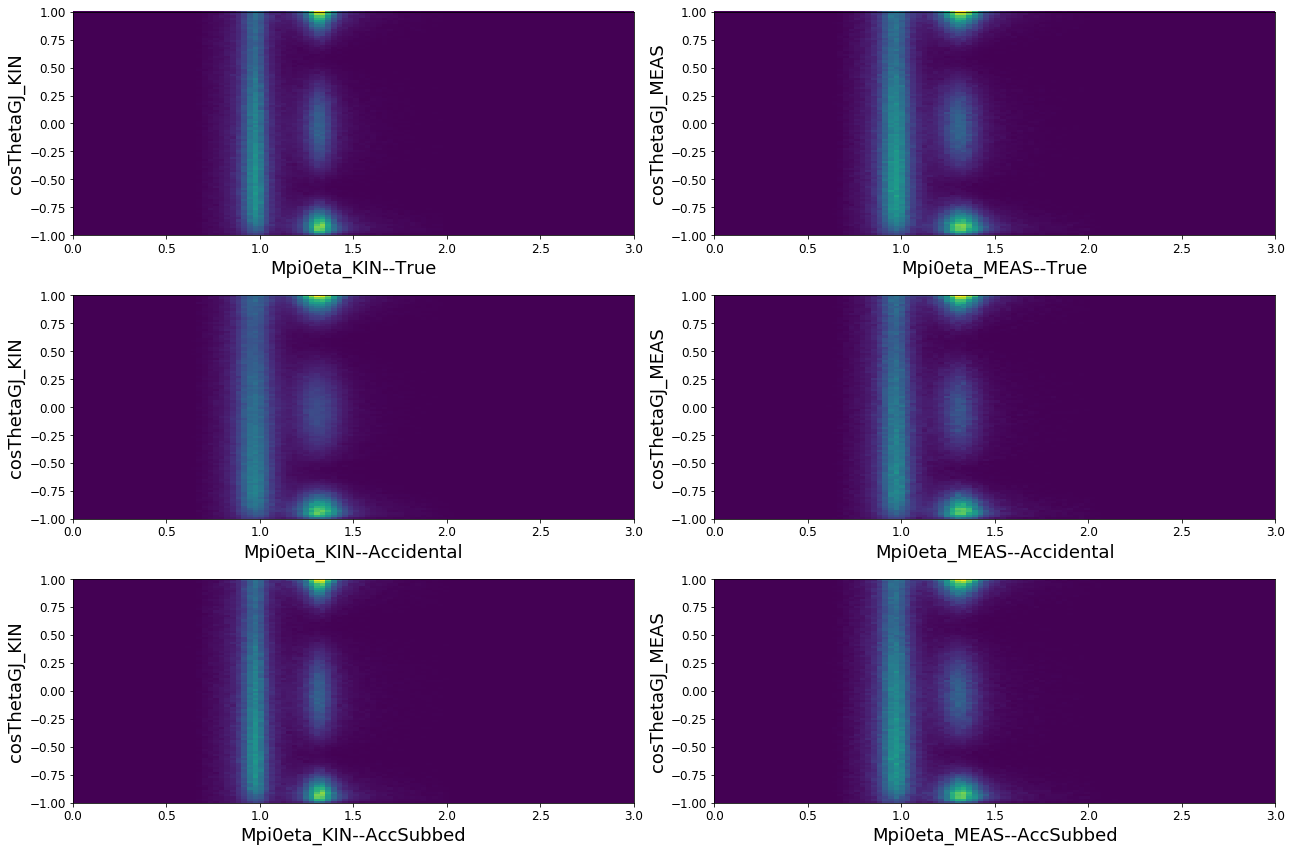

In [38]:
fig,axes=plt.subplots(3,2,figsize=(18,12))
axes=axes.flatten()
labels=["True","Accidental"]
for i,isTrueBeam in enumerate([True,False]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes[2*i].hist2d(df_weightsDataSubset.Mpi0etas,df_weightsDataSubset.cosTheta_eta_gjs,
                   bins=(100,100),range=[[0,3],[-1,1]],label="1231")
    axes[2*i].set_xlabel("Mpi0eta_KIN"+"--"+labels[i],size=18)
    axes[2*i].set_ylabel("cosThetaGJ_KIN",size=18)
    axes[2*i+1].hist2d(df_weightsDataSubset.Mpi0etas_meas,df_weightsDataSubset.cosTheta_eta_gjs_meas,
                   bins=(100,100),range=[[0,3],[-1,1]],label=labels[i])
    axes[2*i+1].set_xlabel("Mpi0eta_MEAS"+"--"+labels[i],size=18)
    axes[2*i+1].set_ylabel("cosThetaGJ_MEAS",size=18)
    
axes[4].hist2d(df_weightsData.Mpi0etas,df_weightsData.cosTheta_eta_gjs,
               bins=(100,100),range=[[0,3],[-1,1]],label=labels[i],
               weights=df_weightsData.AccWeights
              )
axes[4].set_xlabel("Mpi0eta_KIN"+"--AccSubbed",size=18)
axes[4].set_ylabel("cosThetaGJ_KIN",size=18)

axes[5].hist2d(df_weightsData.Mpi0etas_meas,df_weightsData.cosTheta_eta_gjs_meas,
                bins=(100,100),range=[[0,3],[-1,1]],label=labels[i],
                weights=df_weightsData.AccWeights
              )
axes[5].set_xlabel("Mpi0eta_MEAS"+"--AccSubbed",size=18)
axes[5].set_ylabel("cosThetaGJ_MEAS",size=18)
plt.tight_layout()
plt.savefig("combinatoricStudy/comboTrackingGJ.png")

Check the GJ angle explicity

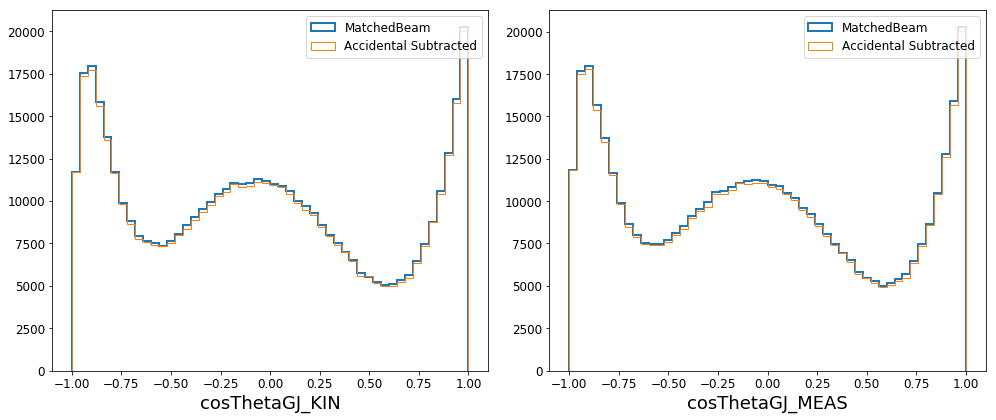

In [39]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
axes=axes.flatten()
labels=["MatchedBeam"]
binedges=np.histogram(df_weightsDataSubset.cosTheta_eta_gjs,bins=50)[1]
for i,isTrueBeam in enumerate([True]):
    df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==isTrueBeam]
    axes[0].hist(df_weightsDataSubset.cosTheta_eta_gjs,label=labels[i],histtype=u'step',bins=binedges,
                linewidth=2)
    axes[0].set_xlabel("cosThetaGJ_KIN",size=18)
    axes[1].hist(df_weightsDataSubset.cosTheta_eta_gjs_meas,label=labels[i],histtype=u'step',bins=binedges,
                linewidth=2)
    axes[1].set_xlabel("cosThetaGJ_MEAS",size=18)
    
axes[0].hist(df_weightsData.cosTheta_eta_gjs,
               weights=df_weightsData.AccWeights, label="Accidental Subtracted",histtype=u'step',bins=binedges
              )

axes[1].hist(df_weightsData.cosTheta_eta_gjs_meas,
                weights=df_weightsData.AccWeights, label="Accidental Subtracted",histtype=u'step',bins=binedges
              )
axes[0].legend()
axes[1].legend()
plt.tight_layout()

## Need to check proton multiplicity

In [40]:
nUniqueProtonIDs=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].groupby("eventNumber").protonIDs.nunique()

Text(0.5,0,'Proton Multiplicty')

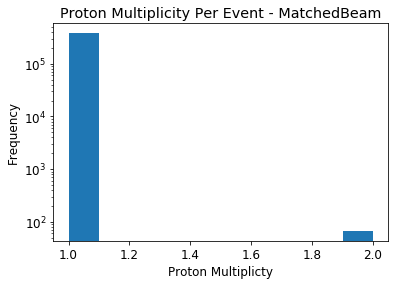

In [41]:
plt.yscale("log")
nUniqueProtonIDs.plot(kind="hist")
plt.title("Proton Multiplicity Per Event - MatchedBeam")
plt.xlabel("Proton Multiplicty")

In [42]:
nUniqueProtonIDs.value_counts()/len(nUniqueProtonIDs)

1    0.999824
2    0.000176
Name: protonIDs, dtype: float64

# Attempt 1: Naive Usage of Combo Tracking. Doing it without knowledge of accidental subtraction

In [43]:
df_weightsData.columns

Index([u'AccWeights', u'Metaps', u'Metas', u'Metas_meas', u'Mpi0eta_thrown',
       u'Mpi0etas', u'Mpi0etas_meas', u'Mpi0ps', u'Mpi0s', u'Mpi0s_meas',
       u'beamIDs', u'beamPhotonMatchToThrowns', u'bestChiWeights', u'chiSqs',
       u'cosTheta_eta_gjs', u'cosTheta_eta_gjs_meas', u'equalWeights',
       u'eventNumber', u'isTruePi0Etas', u'locNumUnusedShowers',
       u'nonUniqueEventNumber', u'probWeights', u'protonIDs', u'rfTimes',
       u'spectBestChiWeights', u'spectEqualWeights', u'spectProbWeights',
       u'weightBS', u'whichSignalRegions', u'sbWeightPi0', u'sbWeightEta',
       u'sbWeight', u'sbASWeight', u'ctASWeight'],
      dtype='object')

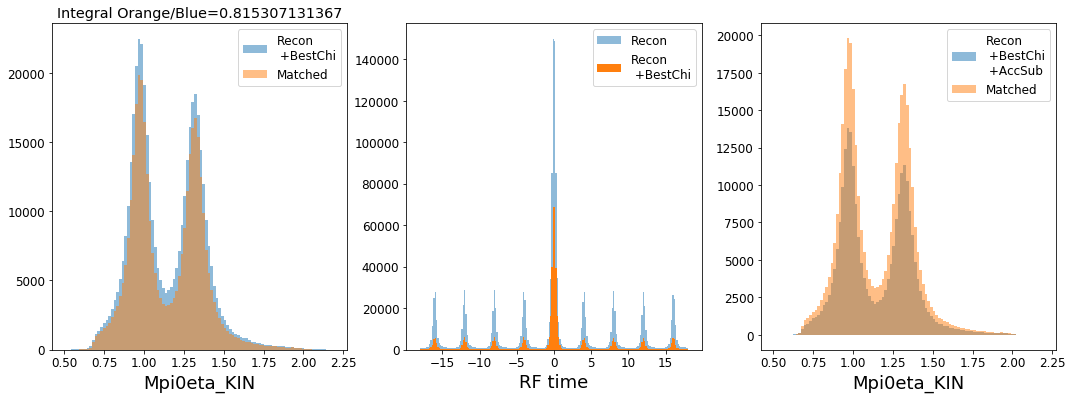

In [44]:
fig,ax=plt.subplots(1,3,figsize=(18,6))

binedges=np.histogram(df_weightsData.Mpi0etas,bins=100)[1]
df_weightsDataTrue=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns==1)*
                                   (df_weightsData.isTruePi0Etas==1)]
ax[0].hist(df_weightsData.Mpi0etas,bins=binedges, weights=df_weightsData.bestChiWeights
        ,label="Recon\n +BestChi",alpha=0.5)
ax[0].hist(df_weightsDataTrue.Mpi0etas,bins=binedges, label='Matched',alpha=0.5)
ax[0].set_xlabel("Mpi0eta_KIN",size=18)
ax[0].set_xlabel("Mpi0eta_KIN",size=18)
ax[0].legend()
integralBestChi=sum(df_weightsData.bestChiWeights)
integralMatched=len(df_weightsDataTrue)
ax[0].set_title("Integral Orange/Blue="+str(integralMatched/integralBestChi))


ax[2].hist(df_weightsData.Mpi0etas,bins=binedges, weights=df_weightsData.bestChiWeights*df_weightsData.AccWeights
        ,label="Recon\n +BestChi\n +AccSub",alpha=0.5)
ax[2].hist(df_weightsDataTrue.Mpi0etas,bins=binedges, label='Matched',alpha=0.5)
ax[2].set_xlabel("Mpi0eta_KIN",size=18)
ax[2].set_xlabel("Mpi0eta_KIN",size=18)
ax[2].legend()


binedges=np.histogram(df_weightsData.rfTimes,bins=200)[1]
ax[1].hist(df_weightsData.rfTimes,bins=binedges,label="Recon",alpha=0.5)
ax[1].hist(df_weightsData.rfTimes,weights=df_weightsData.bestChiWeights,alpha=1,
           bins=binedges,label="Recon\n +BestChi")
ax[1].set_xlabel("RF time",size=18)
ax[1].legend()

# Attempt 2: Checking Mpi0eta distributions and compare tracking + accidental subtraction

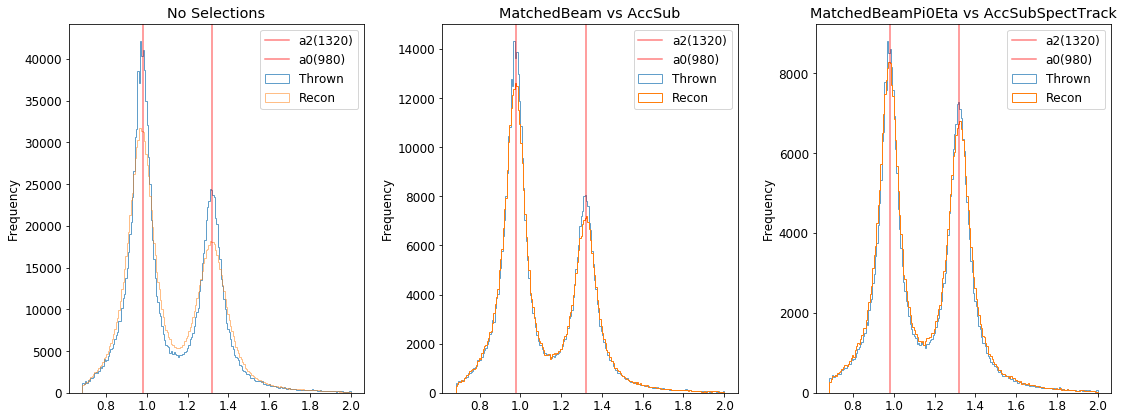

In [45]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
binedges=np.histogram(df_weightsData.Mpi0eta_thrown,bins=200)[1]


df_weightsData.Mpi0eta_thrown.plot(kind="hist",histtype=u'step',bins=binedges,alpha=0.7,ax=ax[0],
                                   label="Thrown")
df_weightsData.Mpi0etas.plot(kind="hist",histtype=u'step',bins=binedges,alpha=0.5,ax=ax[0],
                            label="Recon")
ax[0].axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax[0].axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax[0].set_title("No Selections")
ax[0].legend()


df_weightsData.Mpi0eta_thrown[df_weightsData.beamPhotonMatchToThrowns].plot(kind="hist",bins=binedges
                                                ,histtype=u'step',alpha=0.7,ax=ax[1],
                                   label="Thrown")
df_weightsData.Mpi0etas.plot(kind="hist",histtype=u'step',bins=binedges,
                             weights=df_weightsData.AccWeights,ax=ax[1],
                            label="Recon")
ax[1].axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax[1].axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax[1].set_title("MatchedBeam vs AccSub")
ax[1].legend()

df_weightsData.Mpi0eta_thrown[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)].plot(
    kind="hist",bins=binedges,histtype=u'step',alpha=0.7,ax=ax[2],
                                   label="Thrown")
df_weightsData.Mpi0etas.plot(kind="hist",histtype=u'step',
                             bins=binedges,weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             ax=ax[2],
                            label="Recon")
ax[2].axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax[2].axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax[2].set_title("MatchedBeamPi0Eta vs AccSubSpectTrack")
ax[2].legend()

plt.tight_layout()

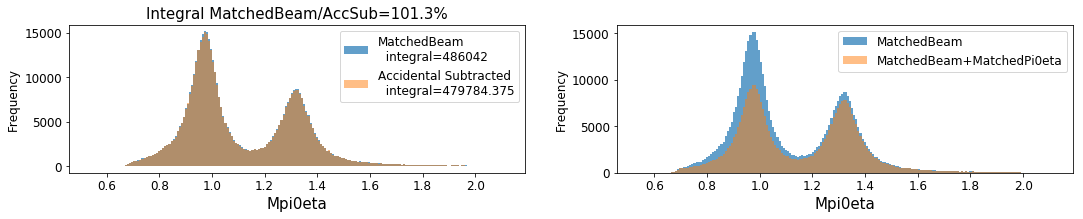

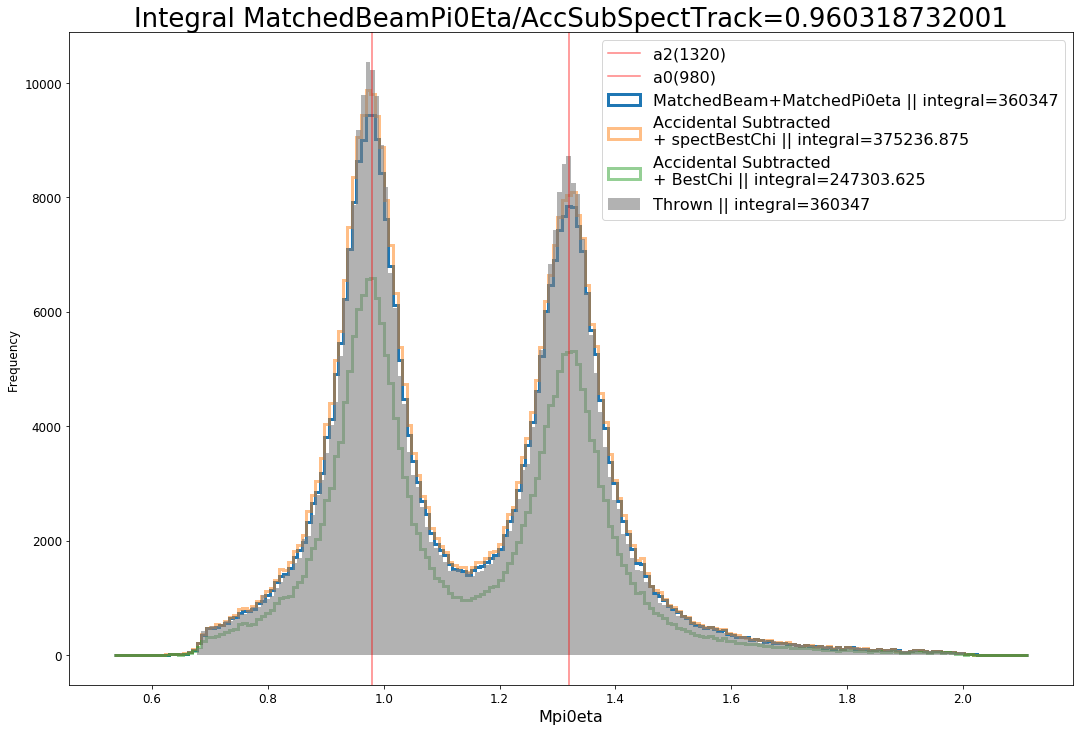

In [46]:
fig = plt.figure(figsize=(18, 6))
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)


# df_weightsDataSubset hold True beam and df_trueBeamPi0eta holds True beam+pi0eta
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True]
df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
binedges=np.histogram(df_weightsDataSubset.Mpi0etas,bins=200)[1]

df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,
                                   label="MatchedBeam"+"\n  integral="+str(len(df_weightsDataSubset)),
                                   ax=ax1,alpha=0.7)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax1,
                             weights=df_weightsData.AccWeights,alpha=0.5,
                             label="Accidental Subtracted"+"\n  integral="+str(sum(df_weightsData.AccWeights))
                            )
percentDifference=int(len(df_weightsDataSubset)/sum(df_weightsData.AccWeights)*1000)/10.0
ax1.set_title("Integral MatchedBeam/AccSub="+str(percentDifference)+"%",size=15)
ax1.legend(prop={'size': 12})
ax1.set_xlabel("Mpi0eta",size=15)

df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="MatchedBeam",ax=ax2,alpha=0.7)
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,label="MatchedBeam+MatchedPi0eta",ax=ax2,alpha=0.5)
ax2.legend(prop={'size': 12})
ax2.set_xlabel("Mpi0eta",size=15)
plt.savefig("combinatoricStudy/Mpi0eta.png")


fig = plt.figure(figsize=(18, 12))
ax3= fig.add_subplot(1,1,1)
integralTrue=len(df_trueBeamPi0eta)
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="MatchedBeam+MatchedPi0eta"+" || integral="+str(integralTrue),
                                ax=ax3,alpha=1,histtype=u'step',linewidth=3)
# df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="TrueBeam\n+ spectBestChi",ax=ax3,
#                                    histtype=u'step',linewidth=2,alpha=0.5,
#                                    weights=df_weightsDataSubset.spectBestChiWeights)
integralSpectSub=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax3,histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             alpha=0.5,
                             label="Accidental Subtracted\n+ spectBestChi"+" || integral="+str(integralSpectSub)
                            )
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax3,histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.bestChiWeights,
                             alpha=0.5,label="Accidental Subtracted\n+ BestChi"+" || integral="+str(sum(df_weightsData.AccWeights*df_weightsData.bestChiWeights))
                            )
df_trueBeamPi0eta.Mpi0eta_thrown.plot(kind="hist",bins=binedges,ax=ax3,
                                      label="Thrown || integral="+str(len(df_trueBeamPi0eta)),
                                      alpha=0.6,linewidth=3,color="grey")
ax3.axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
ax3.axvline(0.98,c='red',label="a0(980)",alpha=0.5)
ax3.legend(prop={'size': 16})
ax3.set_xlabel("Mpi0eta",size=16)
plt.title("Integral MatchedBeamPi0Eta/AccSubSpectTrack="+str(integralTrue/integralSpectSub),size=26)
plt.savefig("combinatoricStudy/Mpi0etaComparison.png")

## Compare {Best,Prob,Equal} Tracking schemes

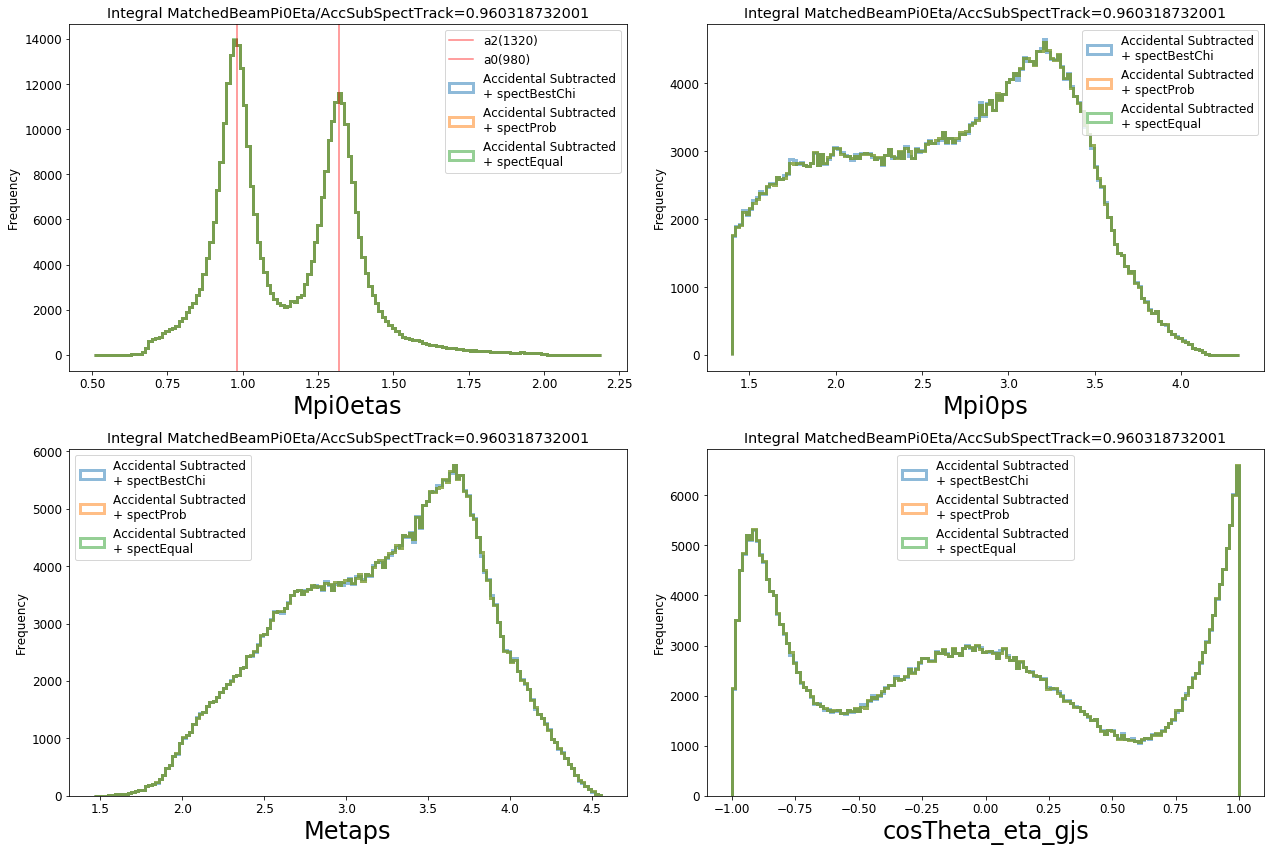

In [47]:
fig,ax = plt.subplots(2,2,figsize=(18, 12))
ax=ax.flatten()

def overlayTrackingDiagHists(var1,ax,legLoc):
    binedges=np.histogram(df_weightsData[var1],bins=150)[1]
    # -- True
    # integralTrue=len(df_trueBeamPi0eta)
    # df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,
    #                                 label="TrueBeam+TruePi0eta"+" || integral="+str(integralTrue),
    #                                 ax=ax3,alpha=1,histtype=u'step',linewidth=3)

    # -- Spect Best
    integralSpectBestSub=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
    df_weightsData[var1].plot(kind="hist",bins=binedges,ax=ax,histtype=u'step',linewidth=3,
                                 weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                                 alpha=0.5,
                                 label="Accidental Subtracted\n+ spectBestChi"
                                )

    # -- Spect Prob
    integralSpectProbSub=sum(df_weightsData.AccWeights*df_weightsData.spectProbWeights)
    df_weightsData[var1].plot(kind="hist",bins=binedges,ax=ax,histtype=u'step',linewidth=3,
                                 weights=df_weightsData.AccWeights*df_weightsData.spectProbWeights,
                                 alpha=0.5,
                                 label="Accidental Subtracted\n+ spectProb"
                                )

    # -- Spect Equal
    integralSpectEqualSub=sum(df_weightsData.AccWeights*df_weightsData.spectEqualWeights)
    df_weightsData[var1].plot(kind="hist",bins=binedges,ax=ax,histtype=u'step',linewidth=3,
                                 weights=df_weightsData.AccWeights*df_weightsData.spectEqualWeights,
                                 alpha=0.5,
                                 label="Accidental Subtracted\n+ spectEqual"
                                )
    if var1=="Mpi0etas":
        ax.axvline(1.32,c='red',label="a2(1320)",alpha=0.5)
        ax.axvline(0.98,c='red',label="a0(980)",alpha=0.5)
    if legLoc != "":
        ax.legend(loc=legLoc)
    ax.set_xlabel(var1,size=24)
    ax.set_title("Integral MatchedBeamPi0Eta/AccSubSpectTrack="+str(integralTrue/integralSpectSub))#,size=26)
    
    
overlayTrackingDiagHists("Mpi0etas",ax[0],"upper right")
overlayTrackingDiagHists("Mpi0ps",ax[1],"upper right")
overlayTrackingDiagHists("Metaps",ax[2],"upper left")
overlayTrackingDiagHists("cosTheta_eta_gjs",ax[3],"upper center")
plt.tight_layout()

## How does the mass distributions look like when looking at events with different number of spectroscopic combos?

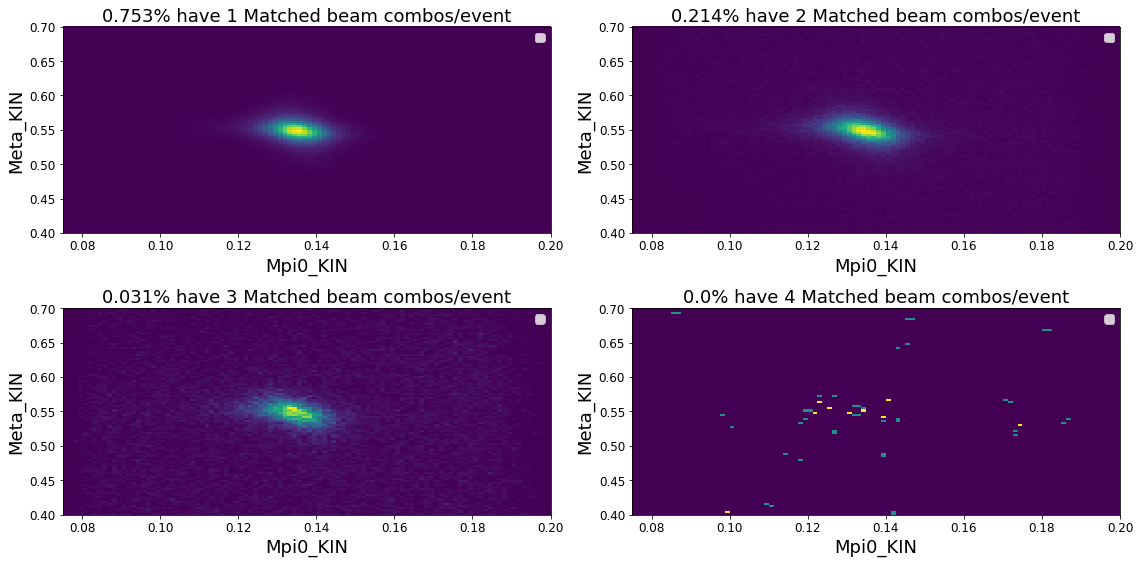

In [48]:
fig, axs = plt.subplots(2,2,figsize=(16,8))
axs=axs.flatten()

# First we select all the combos that uses a True beam photon and count the number of times a combo
# shares the same event number
numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts()
percentCombos=np.histogram(numSpectCombos,bins=numSpectCombos.max())[0]
percentCombos=1.0*percentCombos/percentCombos.sum()
roundedPercentCombos=(percentCombos*1000).astype(int)*1.0/1000

#for iax, ax in enumerate(axs):
for iax, ax in enumerate(roundedPercentCombos):
    if iax>3:
        break
    nComboIndxs=numSpectCombos[numSpectCombos==(iax+1)].index #select all events with N true combos
    df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
    df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]

    # Right now df_weightsDataSubset should have all the events that have selectEventWithNCombos number of 
    # combos with true beam photon
    axs[iax].hist2d(df_weightsDataSubset.Mpi0s,df_weightsDataSubset.Metas, bins=(100,100),
              range=[[0.075,0.2],[0.4,0.7]],label=str(roundedPercentCombos[iax])
                          )
    axs[iax].set_xlabel("Mpi0_KIN",size=18)
    axs[iax].set_ylabel("Meta_KIN",size=18)
    axs[iax].set_title(str(roundedPercentCombos[iax])+"% have "+str(iax+1)+" Matched beam combos/event",size=18)
    axs[iax].legend()
plt.tight_layout()

In the following section we look at combos with True beam photon. This means accidental subtraction is already not needed. We can look at how the mass distributions look like depending on the number of spectroscopic combos  there are in an event. i.e. we will look at Meta for all events that only have 1 spectroscopic combo with the entire dataset subsetted to all the combos with True beam photons

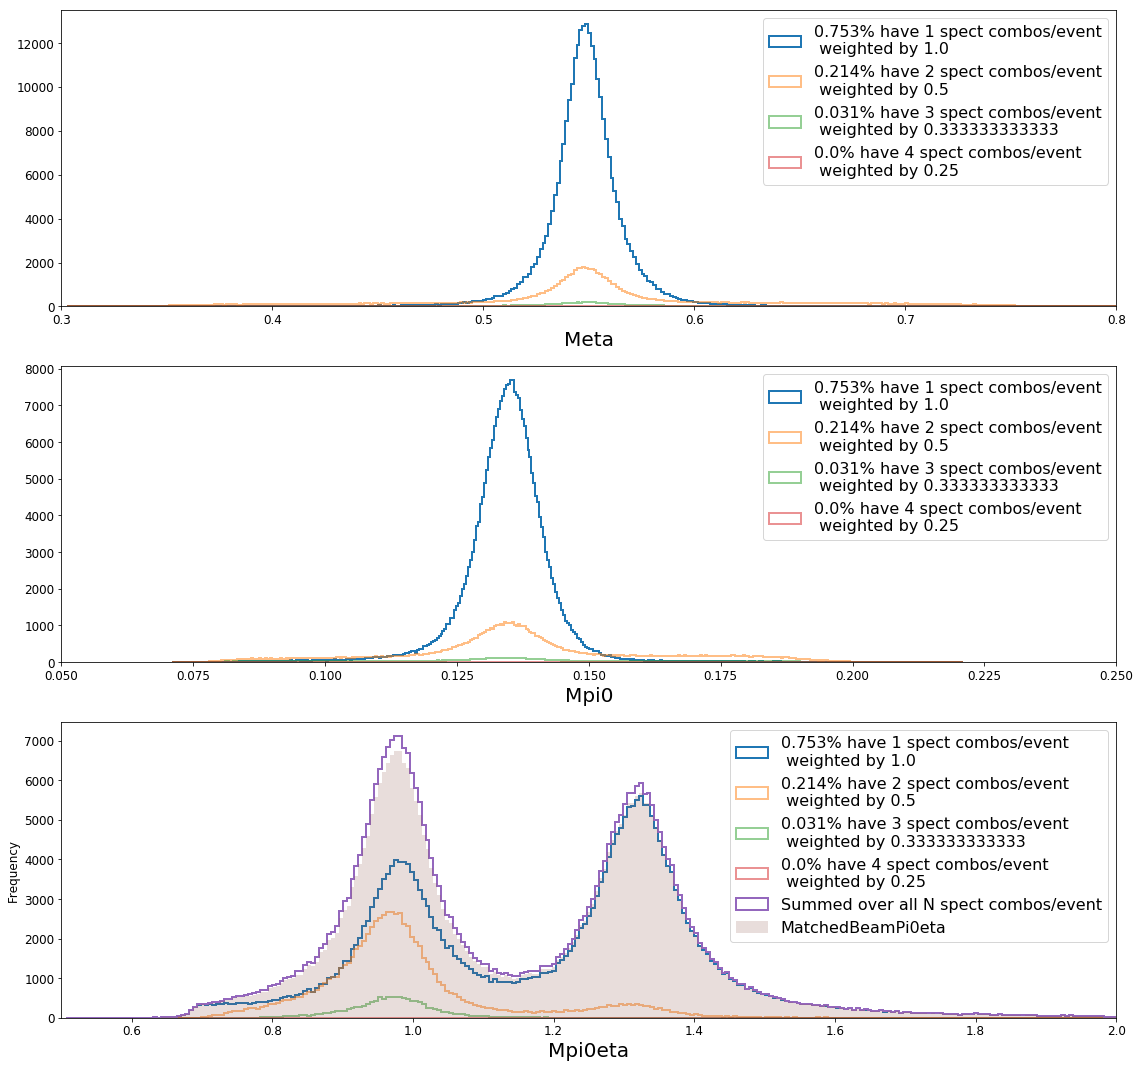

In [49]:
nBins=300

numSpectCombos=df_weightsData[df_weightsData.beamPhotonMatchToThrowns].eventNumber.value_counts()

fig, axs = plt.subplots(3,1,figsize=(16,15))
axs=axs.flatten()
binedges=np.histogram(df_weightsData.Metas,bins=400)[1]
for i in range(4):
    nComboIndxs=numSpectCombos[numSpectCombos==(i+1)].index #select all events with N true combos
    if len(nComboIndxs)!=0:
        df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
        df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]

        weights=[1.0/(i+1)]*len(df_weightsDataSubset)
        label=str(roundedPercentCombos[i])+"% have "+str(i+1)+" spect combos/event"
        label+="\n weighted by "+str(1./(i+1))
        if i==0:
            axs[0].hist(df_weightsDataSubset["Metas"],bins=binedges,histtype=u'step',linewidth=2,
                    label=label,weights=weights)
        else:
            axs[0].hist(df_weightsDataSubset["Metas"],bins=binedges,histtype=u'step',linewidth=2,alpha=0.5,
                    label=label,weights=weights)
axs[0].set_xlabel("Meta",size=20)
axs[0].set_xlim(0.3,0.8)
axs[0].legend(prop={'size': 16})

                       
binedges=np.histogram(df_weightsData.Mpi0s,bins=400)[1]
for i in range(4):
    nComboIndxs=numSpectCombos[numSpectCombos==(i+1)].index #select all events with N true combos
    if len(nComboIndxs)!=0:
        df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
        df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]

        weights=[1.0/(i+1)]*len(df_weightsDataSubset)
        label=str(roundedPercentCombos[i])+"% have "+str(i+1)+" spect combos/event"
        label+="\n weighted by "+str(1./(i+1))
        if i==0:
            axs[1].hist(df_weightsDataSubset["Mpi0s"],bins=binedges,histtype=u'step',linewidth=2,
                    label=label,weights=weights)
        else:
            axs[1].hist(df_weightsDataSubset["Mpi0s"],bins=binedges,histtype=u'step',linewidth=2,alpha=0.5,
                    label=label,weights=weights)
axs[1].set_xlabel("Mpi0",size=20)
axs[1].set_xlim(0.05,0.25)
axs[1].legend(prop={'size': 16})

saveDFs=[]
saveWeights=[]
binedges=np.histogram(df_weightsData.Mpi0etas,bins=nBins)[1]
for i in range(4):
    nComboIndxs=numSpectCombos[numSpectCombos==(i+1)].index #select all events with N true combos
    if len(nComboIndxs)!=0:
        df_weightsDataSubset=df_weightsData[df_weightsData.eventNumber.isin(nComboIndxs)]
        df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.beamPhotonMatchToThrowns]
        saveDFs.append(df_weightsDataSubset)

        label=str(roundedPercentCombos[i])+"% have "+str(i+1)+" spect combos/event"
        label+="\n weighted by "+str(1./(i+1))
        saveWeights.append(pd.DataFrame([1.0/(i+1)]*len(df_weightsDataSubset)))
        if i==0:
            axs[2].hist(df_weightsDataSubset["Mpi0etas"],bins=binedges,histtype=u'step',linewidth=2,
                    label=label,weights=saveWeights[i][0].values)
        else:
            axs[2].hist(df_weightsDataSubset["Mpi0etas"],bins=binedges,histtype=u'step',linewidth=2,alpha=0.5,
                    label=label,weights=saveWeights[i][0].values)
axs[2].set_xlabel("Mpi0eta",size=20)
axs[2].set_xlim(0.5,2)
df_weightsDataSubset=df_weightsData[df_weightsData.beamPhotonMatchToThrowns==True]
df_weightsDataSubset=df_weightsDataSubset[df_weightsDataSubset.isTruePi0Etas==True]
axs[2].hist(pd.concat(saveDFs,ignore_index=True).Mpi0etas,bins=binedges,histtype=u'step',
         weights=pd.concat(saveWeights,ignore_index=True)[0],label="Summed over all N spect combos/event",linewidth=2)
df_weightsDataSubset.Mpi0etas.plot(kind="hist",bins=binedges,label="MatchedBeamPi0eta",ax=axs[2],alpha=0.2)
axs[2].legend(prop={'size': 16})

plt.tight_layout()

## Including sideband subtraction

In [50]:
def addRegions(ax,mass,sigma,sigs,direction,showWeight):
    colors=["red","orange","yellow","green","blue","purple"]
    for i,iSig in enumerate(sigs):
        if direction=="h":
            ax.axhline(mass+iSig*sigma,c=colors[i])
            ax.axhline(mass-iSig*sigma,c=colors[i])
        else:
            ax.axvline(mass+iSig*sigma,c=colors[i])
            ax.axvline(mass-iSig*sigma,c=colors[i])
        sbWeight=-1*(2.*sigs[0])/(2.*(sigs[2]-sigs[1]))
        if showWeight:
            ax.text(0.95, 0.9, "sbWeight: "+str(sbWeight),
                verticalalignment='bottom', horizontalalignment='right',
                transform=ax.transAxes,
                color='black', fontsize=15,
                bbox={'facecolor': 'gray', 'alpha': 1, 'pad': 10}
                )

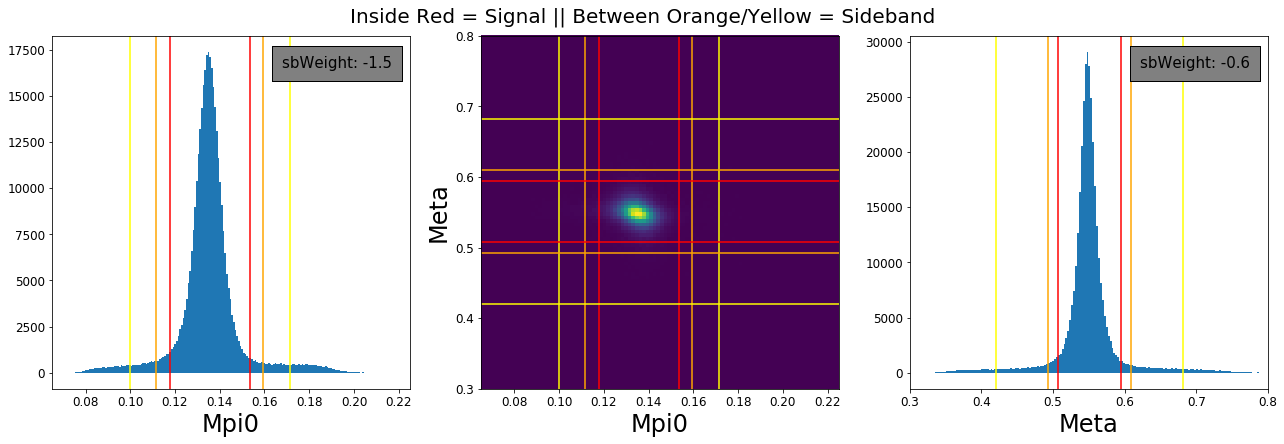

In [51]:
fig,ax = plt.subplots(1,3,figsize=(18,6))

ax[0].hist(df_weightsData.Mpi0s,bins=200,weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
ax[0].set_xlabel("Mpi0",size=24)
ax[0].set_xlim(pi0min,pi0max)
addRegions(ax[0],meanPi0,sigmaPi0,pi0SigRegions,"v",True)


ax[1].hist2d(df_weightsData.Mpi0s,df_weightsData.Metas,
             bins=(100,100),range=[[pi0min,pi0max],[etamin,etamax]],
             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights
                      )
ax[1].set_xlabel("Mpi0",size=24)
ax[1].set_ylabel("Meta",size=24)
addRegions(ax[1],meanPi0,sigmaPi0,pi0SigRegions,"v",False)
addRegions(ax[1],meanEta,sigmaEta,etaSigRegions,"h",False)



ax[2].hist(df_weightsData.Metas,bins=200,weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
ax[2].set_xlabel("Meta",size=24)
ax[2].set_xlim(etamin,etamax)
addRegions(ax[2],meanEta,sigmaEta,etaSigRegions,"v",True)
plt.tight_layout()

st=fig.suptitle("Inside Red = Signal || Between Orange/Yellow = Sideband", fontsize=20)
st.set_y(1.025)

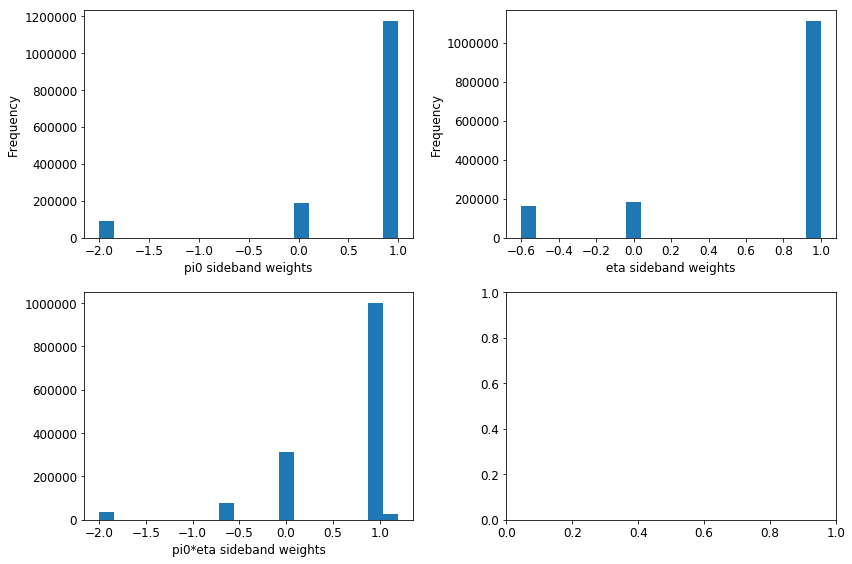

In [52]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
df_weightsData.sbWeightPi0.plot(kind='hist',ax=ax[0],bins=20)
ax[0].set_xlabel("pi0 sideband weights")
df_weightsData.sbWeightEta.plot(kind='hist',ax=ax[1],bins=20)
ax[1].set_xlabel("eta sideband weights")
ax[2].hist(df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta,bins=20)
ax[2].set_xlabel("pi0*eta sideband weights")
plt.tight_layout()

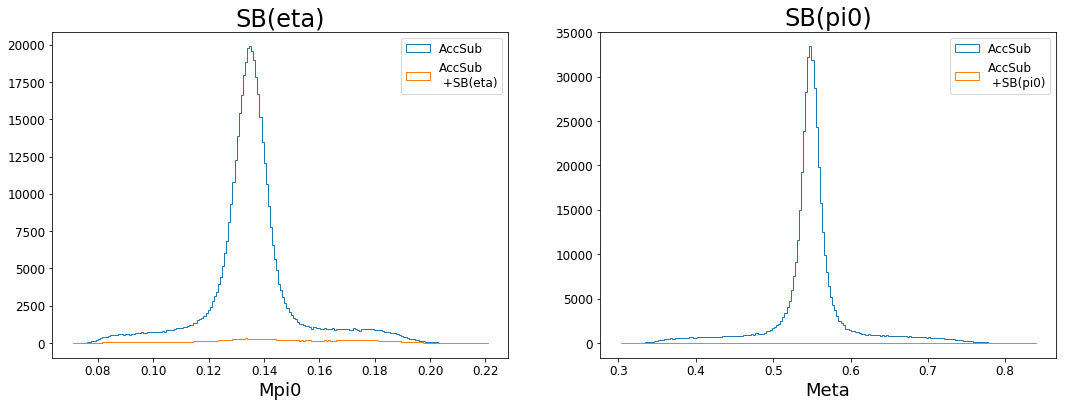

In [53]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
ax=ax.flatten()

# Mpi0 after sideband subtraction
binedges=np.histogram(df_weightsData.Mpi0s,bins=200)[1]
ax[0].hist(df_weightsData.Mpi0s,bins=binedges,
           weights=df_weightsData.AccWeights,histtype=u'step',label="AccSub")
df_weightsData_SB=df_weightsData.Mpi0s[df_weightsData.sbWeightEta==-0.6]
ax[0].hist(df_weightsData_SB,bins=binedges,
           weights=df_weightsData_SB,histtype=u'step',
          label="AccSub\n +SB(eta)")
ax[0].set_xlabel("Mpi0",size=18)
ax[0].set_title("SB(eta)",size=24)
ax[0].legend()

# Meta after sideband subtraction
binedges=np.histogram(df_weightsData.Metas,bins=200)[1]
ax[1].hist(df_weightsData.Metas,bins=binedges,
           weights=df_weightsData.AccWeights,histtype=u'step',label="AccSub")
df_weightsData_SB=df_weightsData.Metas[df_weightsData.sbWeightPi0==-1.5]
ax[1].hist(df_weightsData_SB,bins=binedges,
           weights=df_weightsData_SB,histtype=u'step',
          label="AccSub\n +SB(pi0)")
ax[1].set_xlabel("Meta",size=18)
ax[1].set_title("SB(pi0)",size=24)
ax[1].legend()

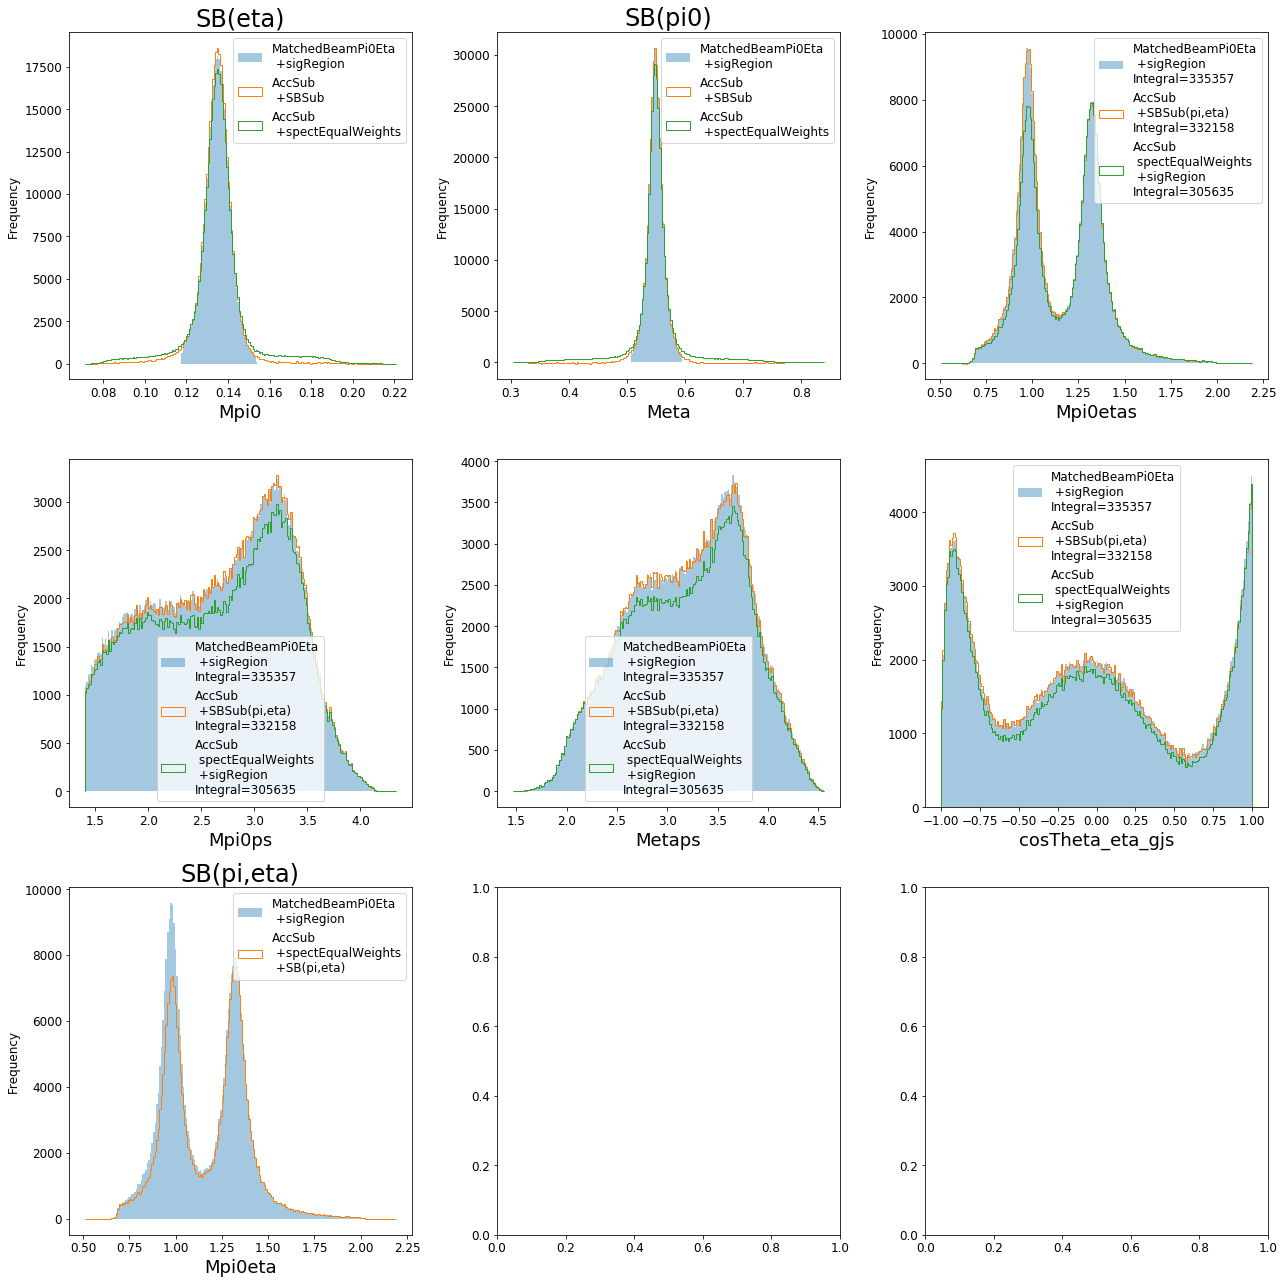

In [54]:
weightToApply="spectEqualWeights"


fig,ax=plt.subplots(3,3,figsize=(18,18))
ax=ax.flatten()
df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
df_trueBeamPi0etaSigReg=df_trueBeamPi0eta[(df_trueBeamPi0eta.sbWeightPi0==1)*
                                          (df_trueBeamPi0eta.sbWeightEta==1)]

# Mpi0 after applying sideband subtraction
binedges=np.histogram(df_weightsData.Mpi0s,bins=200)[1]
df_trueBeamPi0etaSigReg.Mpi0s.plot(kind="hist",bins=binedges,
                                ax=ax[0],alpha=0.4,linewidth=2,label="MatchedBeamPi0Eta\n +sigRegion")
ax[0].hist(df_weightsData.Mpi0s,bins=binedges,
           weights=df_weightsData.AccWeights*
          df_weightsData.sbWeightEta,histtype=u'step',label="AccSub\n +SBSub")
ax[0].hist(df_weightsData.Mpi0s,bins=binedges,
           weights=df_weightsData.AccWeights*df_weightsData[weightToApply],histtype=u'step',
          label="AccSub\n +"+weightToApply)
ax[0].set_xlabel("Mpi0",size=18)
ax[0].set_title("SB(eta)",size=24)
ax[0].legend()

# Meta after applying sideband subtraction 
binedges=np.histogram(df_weightsData.Metas,bins=200)[1]
df_trueBeamPi0etaSigReg.Metas.plot(kind="hist",bins=binedges,
                                ax=ax[1],alpha=0.4,linewidth=2,label="MatchedBeamPi0Eta\n +sigRegion")
ax[1].hist(df_weightsData.Metas,bins=binedges,
           weights=df_weightsData.AccWeights*
          df_weightsData.sbWeightPi0,histtype=u'step',label="AccSub\n +SBSub")
ax[1].hist(df_weightsData.Metas,bins=binedges,
           weights=df_weightsData.AccWeights*df_weightsData[weightToApply],histtype=u'step',
          label="AccSub\n +"+weightToApply)
ax[1].set_xlabel("Meta",size=18)
ax[1].set_title("SB(pi0)",size=24)
ax[1].legend()

def compareTrue_SB_Track(dataSB,dataSignal,trueData,var1,ax,legLoc):
    '''
    dataSB contains the unrestricted data, there is no selection on the Mpi0/Meta signal region since we 
        need the sideband weights
    dataSignal/MatchedData contains a signal region restricted dataset. MatchedData uses MatchedBeam+MatchedPi0Eta
        information
    '''
    binedges=np.histogram(dataSB[var1],bins=200)[1]
    trueData[var1].plot(kind="hist",bins=binedges,
                                    ax=ax,alpha=0.4,linewidth=2,
                        label="MatchedBeamPi0Eta\n +sigRegion\nIntegral="
                       +str(int(len(trueData)))
                       )
    ax.hist(dataSB[var1],bins=binedges,
               weights=dataSB.AccWeights*
              dataSB.sbWeightEta*dataSB.sbWeightPi0,histtype=u'step',
            label="AccSub\n +SBSub(pi,eta)\nIntegral="
           +str(int(sum(dataSB.AccWeights*dataSB.sbWeightEta*dataSB.sbWeightPi0)))
           )
    ax.hist(dataSignal[var1],bins=binedges,
               weights=dataSignal.AccWeights*dataSignal[weightToApply],histtype=u'step',
              label="AccSub\n "+weightToApply+"\n +sigRegion\nIntegral="
           +str(int(sum(dataSignal.AccWeights*dataSignal[weightToApply])))
           )
    ax.set_xlabel(var1,size=18)
    if legLoc!="":
        ax.legend(loc=legLoc)
    else:
        ax.legend()

        
df_weightsDataSignal=df_weightsData[(df_weightsData.sbWeightPi0==1)*(df_weightsData.sbWeightEta==1)]
compareTrue_SB_Track(df_weightsData,df_weightsDataSignal,df_trueBeamPi0etaSigReg,"Mpi0etas",ax[2],"")
compareTrue_SB_Track(df_weightsData,df_weightsDataSignal,df_trueBeamPi0etaSigReg,"Mpi0ps",ax[3],"lower center")
compareTrue_SB_Track(df_weightsData,df_weightsDataSignal,df_trueBeamPi0etaSigReg,"Metaps",ax[4],"lower center")
compareTrue_SB_Track(df_weightsData,df_weightsDataSignal,df_trueBeamPi0etaSigReg,"cosTheta_eta_gjs",ax[5],"")


# Mpi0eta after applying and sideband subtraction
binedges=np.histogram(df_weightsData.Mpi0etas,bins=200)[1]
df_trueBeamPi0etaSigReg.Mpi0etas.plot(kind="hist",bins=binedges,
                                ax=ax[6],alpha=0.4,linewidth=2,label="MatchedBeamPi0Eta\n +sigRegion")
ax[6].hist(df_weightsData.Mpi0etas,bins=binedges,
           weights=df_weightsData.AccWeights*df_weightsData[weightToApply]*
           df_weightsData.sbWeightEta*df_weightsData.sbWeightPi0
           ,histtype=u'step',
          label="AccSub\n +"+weightToApply+"\n +SB(pi,eta)")
ax[6].set_xlabel("Mpi0eta",size=18)
ax[6].set_title("SB(pi,eta)",size=24)
ax[6].legend()


plt.tight_layout()

Minor detail: The total integral never changes between the different tracking schemes + accidentals. If we make a selection on the pi0eta signal region the integrals do change

In [55]:
print((df_weightsData["spectEqualWeights"]).sum())
print((df_weightsData["spectProbWeights"]).sum())

1142515.0
1142515.0


In [56]:
print((df_weightsData.AccWeights*df_weightsData["spectEqualWeights"]).sum())
print((df_weightsData.AccWeights*df_weightsData["spectProbWeights"]).sum())

375236.875
375236.875


In [57]:
print((df_weightsDataSignal.AccWeights*df_weightsDataSignal["spectEqualWeights"]).sum())
print((df_weightsDataSignal.AccWeights*df_weightsDataSignal["spectProbWeights"]).sum())

305635.9375
305636.2364241495


### Finally we make the histograms to compare the performance of tracking with sideband subtraction

Maybe a better comparison is comparing Matched w/ CT without the signal region selection and Matched w/ SB with the signal region selection. Just to show that both of them are very similar to the Matched. The lesson we learn above is that we cannot touch Meta nor Mpi0 after doing combo tracking since we use it during weight determination. If we want to combine things independently then we might want to track proton multiplicity.

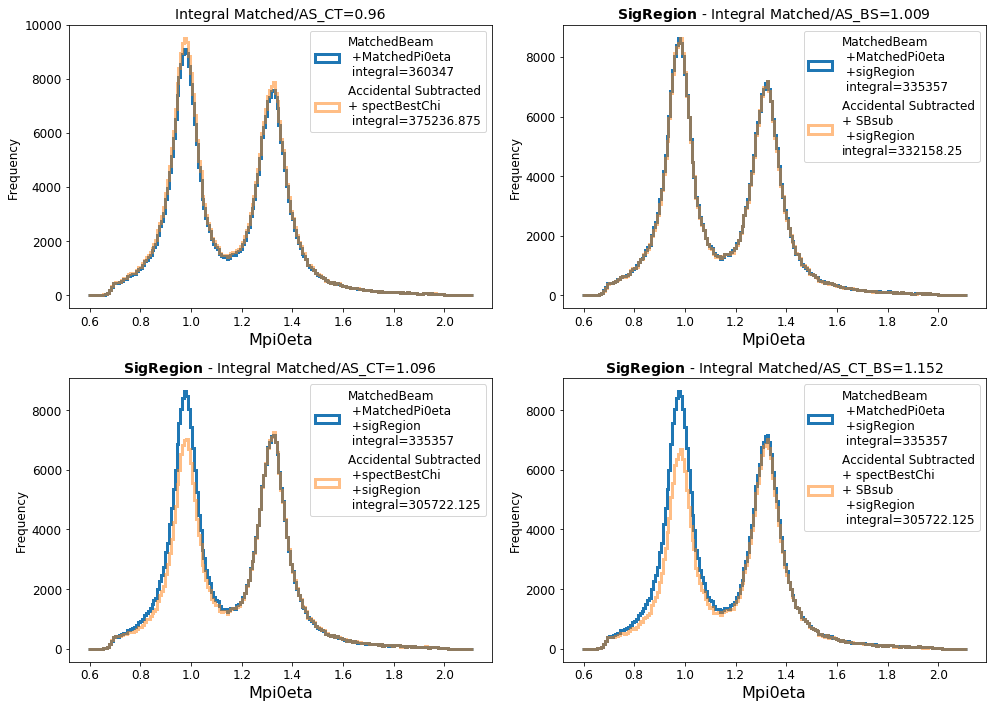

In [58]:
fig,ax=plt.subplots(2,2,figsize=(14, 10))
ax=ax.flatten()

df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
binedges=np.histogram(df_trueBeamPi0eta.Mpi0etas,bins=200)[1]

# AS_CT
integralTrue=len(df_trueBeamPi0eta)
df_trueBeamPi0eta.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="MatchedBeam\n +MatchedPi0eta"+"\n integral="+str(integralTrue),
                                ax=ax[0],alpha=1,histtype=u'step',linewidth=3)
integralSpectSub=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[0],histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights,
                             alpha=0.5,
                             label="Accidental Subtracted\n+ spectBestChi"+"\n integral="
                             +str(integralSpectSub))
ax[0].legend(prop={'size': 12})
ax[0].set_xlabel("Mpi0eta",size=16)
ax[0].set_title("Integral Matched/AS_CT="+
                str(int(1000*integralTrue/integralSpectSub)/1000.0),size=14)

# AS_SB
df_trueBeamPi0etaSigReg=df_trueBeamPi0eta[(df_trueBeamPi0eta.sbWeightPi0==1)*(df_trueBeamPi0eta.sbWeightEta==1)]
integralTrueSigReg=len(df_trueBeamPi0etaSigReg)
df_trueBeamPi0etaSigReg.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="MatchedBeam\n +MatchedPi0eta\n +sigRegion"+"\n integral="
                                      +str(integralTrueSigReg),
                                ax=ax[1],alpha=1,histtype=u'step',linewidth=3)
integralSpectSubSB=sum(df_weightsData.AccWeights*df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[1],histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*
                             df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta, alpha=0.5,
                             label="Accidental Subtracted\n+ SBsub"+"\n +sigRegion\nintegral="
                             +str(integralSpectSubSB))
ax[1].legend(prop={'size': 12})
ax[1].set_xlabel("Mpi0eta",size=16)
ax[1].set_title(r"$\bf{SigRegion}$"+" - Integral Matched/AS_BS="+
                str(int(1000*integralTrueSigReg/integralSpectSubSB)/1000.0),size=14)



# AS_CT + Selects signal region
df_trueBeamPi0etaSigRegion=df_trueBeamPi0eta[(df_trueBeamPi0eta.sbWeightPi0==1) & (df_trueBeamPi0eta.sbWeightEta==1)]
df_weightsDataSigRegion=df_weightsData[(df_weightsData.sbWeightPi0==1) & (df_weightsData.sbWeightEta==1)]
integralTrue=len(df_trueBeamPi0etaSigRegion)
df_trueBeamPi0etaSigRegion.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="MatchedBeam\n +MatchedPi0eta\n +sigRegion"+"\n integral="+str(integralTrue),
                                ax=ax[2],alpha=1,histtype=u'step',linewidth=3)
integralSpectSub=sum(df_weightsDataSigRegion.AccWeights*df_weightsDataSigRegion.spectBestChiWeights)
df_weightsDataSigRegion.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[2],histtype=u'step',linewidth=3,
                             weights=df_weightsDataSigRegion.AccWeights*df_weightsDataSigRegion.spectBestChiWeights,
                             alpha=0.5,
                             label="Accidental Subtracted\n +spectBestChi\n +sigRegion"+"\n integral="
                             +str(integralSpectSub))
ax[2].legend(prop={'size': 12})
ax[2].set_xlabel("Mpi0eta",size=16)
ax[2].set_title(r"$\bf{SigRegion}$"+" - Integral Matched/AS_CT="+
                str(int(1000*integralTrue/integralSpectSub)/1000.0),size=14)


# AS_CT_SB
df_trueBeamPi0etaSigReg=df_trueBeamPi0eta[(df_trueBeamPi0eta.sbWeightPi0==1)*(df_trueBeamPi0eta.sbWeightEta==1)]
integralTrueSigReg=len(df_trueBeamPi0etaSigReg)
df_trueBeamPi0etaSigReg.Mpi0etas.plot(kind="hist",bins=binedges,
                                label="MatchedBeam\n +MatchedPi0eta\n +sigRegion"+"\n integral="
                                      +str(integralTrueSigReg),
                                ax=ax[3],alpha=1,histtype=u'step',linewidth=3)
integralSpectSubSB=sum(df_weightsData.AccWeights*df_weightsData.spectBestChiWeights*
                       df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta)
df_weightsData.Mpi0etas.plot(kind="hist",bins=binedges,ax=ax[3],histtype=u'step',linewidth=3,
                             weights=df_weightsData.AccWeights*df_weightsData.spectBestChiWeights*
                             df_weightsData.sbWeightPi0*df_weightsData.sbWeightEta, alpha=0.5,
                             label="Accidental Subtracted\n+ spectBestChi\n+ SBsub"+"\n +sigRegion\n integral="
                             +str(integralSpectSub))
ax[3].legend(prop={'size': 12})
ax[3].set_xlabel("Mpi0eta",size=16)
ax[3].set_title(r"$\bf{SigRegion}$"+" - Integral Matched/AS_CT_BS="+
                str(int(1000*integralTrueSigReg/integralSpectSubSB)/1000.0),size=14)
plt.tight_layout()




#plt.savefig("combinatoricStudy/Mpi0etaComparison.png")

## Lets first look at the 2D plot of the different regions for signal/sideband/skip

In [59]:
# fig,ax=plt.subplots(2,3,figsize=(12,8))
# st=fig.suptitle("Only hist of corner events not on log-scale", fontsize=14)
# st.set_y(1.025)
# rangemin=0.35
# rangemax=0.75

# #plt.title("Only hist of corner events not on log-scale")
# ax=ax.flatten()
# df_trueBeamPi0eta=df_weightsData[(df_weightsData.beamPhotonMatchToThrowns) & (df_weightsData.isTruePi0Etas)]
# ax[0].hist2d(df_trueBeamPi0eta.Mpi0s,df_trueBeamPi0eta.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[0].set_title("nentries: "+str(len(df_trueBeamPi0eta)))

# df_trueBeamPi0etaSigReg1=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==1]
# ax[1].hist2d(df_trueBeamPi0etaSigReg1.Mpi0s,df_trueBeamPi0etaSigReg1.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[1].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg1)))

# df_trueBeamPi0etaSigReg2=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==2]
# ax[2].hist2d(df_trueBeamPi0etaSigReg2.Mpi0s,df_trueBeamPi0etaSigReg2.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]])#,norm=mpl.colors.LogNorm())
# ax[2].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg2)))

# df_trueBeamPi0etaSigReg3=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==3]
# ax[3].hist2d(df_trueBeamPi0etaSigReg3.Mpi0s,df_trueBeamPi0etaSigReg3.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[3].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg3)))

# df_trueBeamPi0etaSigReg4=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==4]
# ax[4].hist2d(df_trueBeamPi0etaSigReg4.Mpi0s,df_trueBeamPi0etaSigReg4.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[4].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg4)))

# df_trueBeamPi0etaSigReg5=df_trueBeamPi0eta[df_trueBeamPi0eta.whichSignalRegions==5]
# ax[5].hist2d(df_trueBeamPi0etaSigReg5.Mpi0s,df_trueBeamPi0etaSigReg5.Metas,
#              bins=(100,100),range=[[0.08,0.2],[rangemin,rangemax]],norm=mpl.colors.LogNorm())
# ax[5].set_title("nentries: "+str(len(df_trueBeamPi0etaSigReg5)))
# plt.tight_layout()

# # mapping of the region to the weight.
# mapRegionToWeight={
#     1:1,
#     2:0.5,
#     3:-0.5,
#     4:-1,
#     5:0
# }
# df_weightsData.weightBS=map(mapRegionToWeight.get,np.array(df_weightsData.whichSignalRegions.values))\